In [1]:
library(glue)
library(rjags)

Warning message:
"package 'rjags' was built under R version 3.6.3"Loading required package: coda
Warning message:
"package 'coda' was built under R version 3.6.3"Linked to JAGS 4.3.0
Loaded modules: basemod,bugs


## Exercise 1

a) Previous studies have shown that the probability to fail has a binomial distribution with p=0.15. 
Taking into consideration this information, the prior distribution of y of the 75 samples of the new study  is a binomial $Bin(y|p=0.15,n=75)$

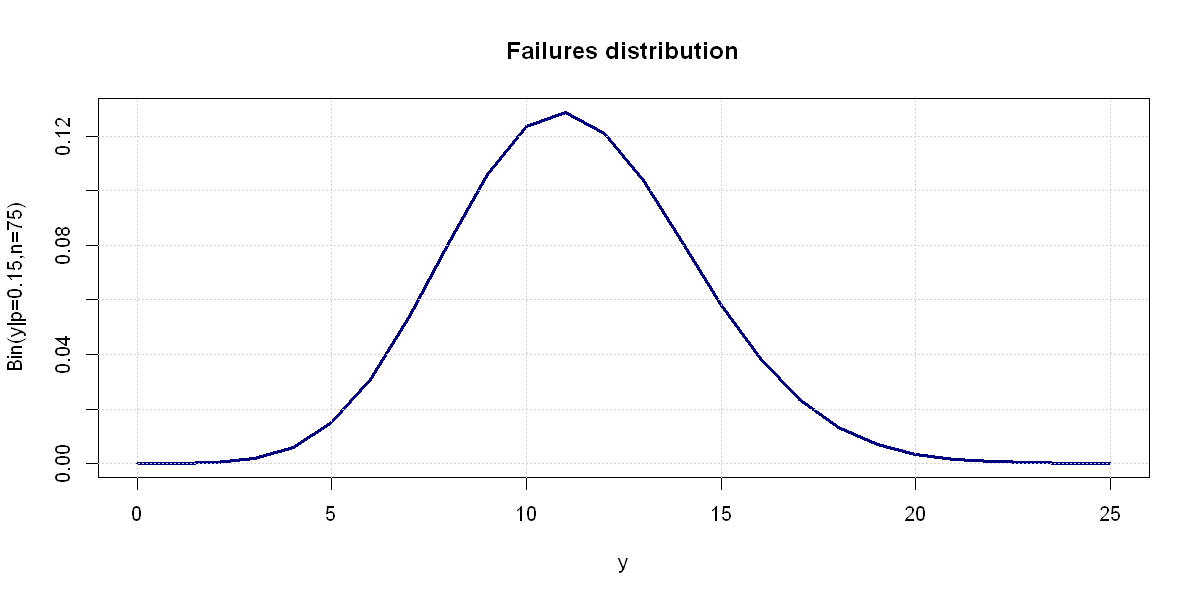

In [2]:
p_fail <- 0.15
n <- 75
x_range<-seq(from=0, to=25, by=1)
data <- dbinom(x_range, n, p_fail)
options(repr.plot.width=10, repr.plot.height=5) 
plot(x_range,data,type="l",lwd=3,col="navyblue", main="Failures distribution",xlab="y",ylab="Bin(y|p=0.15,n=75)")
grid()

In [3]:
#b) on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. 
#What is the frequentist estimator of the failure probability of the new method ?

y <- 6
n <- 75
#the frequency estimator is simply y/n:
p_f <- y/n
var_f <- p_f*(1-p_f)/n
std_f <- sqrt(var_f)

cat("The frequency estimator is p =",p_f,"+/-",round(std_f,digits=2),"and the variance is var =",round(var_f,digits=5))

The frequency estimator is p = 0.08 +/- 0.03 and the variance is var = 0.00098

c) If we have a Beta prior distribution $Beta(\alpha,\beta)$ with $\mu_0=0.15$ and $\sigma_0 = 0.14$:
$$
\mu_0 = \frac{\alpha}{\alpha + \beta} = p_0
$$
$$
\sigma_0^2= \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha+\beta+1)}
$$

Then:
$$
\beta = \frac{\alpha}{p_0} - \alpha
$$
$$
\alpha = \frac{p_0^2(1-p_0)}{\sigma_0^2}-p_0
$$

The Posterior is a Beta Distribution $Beta(\alpha',\beta')$ with $\alpha'=\alpha+y$,  $\beta'=\beta+n-y$

The prior distribution is Beta(1,5)

The posterior distribution is Beta(7,74)

The mean of the posterior is 0.08+/-0.03, the variance instead is 0.00095.

The bayesian estimator for p is the mean.

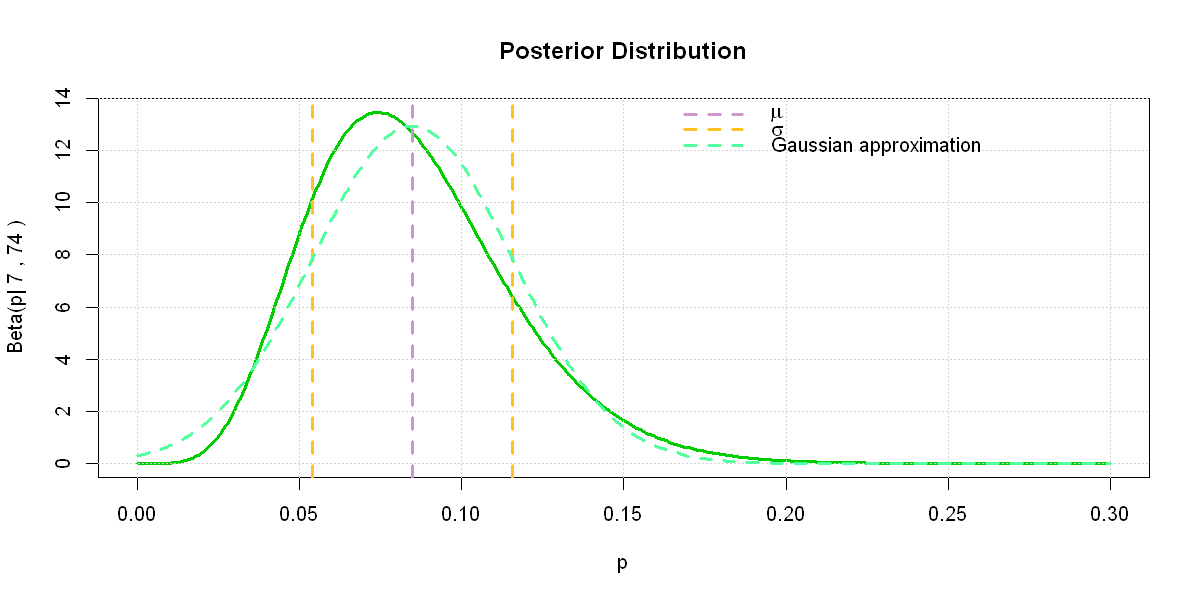

In [4]:
p0 <- 0.15 #mean of the beta, but also probability
std <- 0.14

a <- (((1-p0)*(p0^2))/std^2)-p0 #formula calculated using std^2 = ab/((a+b)^2(a+b+1))
b <- a/p0 - a
a_ <- round(a, digits=0)
b_ <- round(b, digits=0)
glue("The prior distribution is Beta({a_},{b_})")

a_post <- a + y
b_post <- b + n - y
a_p <- round(a_post, digits=0)
b_p <- round(b_post, digits=0)
glue("The posterior distribution is Beta({a_p},{b_p})")

mean <- a_post/(a_post + b_post)
var <- (a_post*b_post)/((a_post+b_post)^2*(a_post+b_post+1))
std <- var^0.5
m <- round(mean, digits=2)
v <- round(var, digits=5)
s <- round(std, digits=2)
glue("The mean of the posterior is {m}+/-{s}, the variance instead is {v}.")
cat("The bayesian estimator for p is the mean.")

x_range <- seq(from=0,to=0.3, by=0.001)
beta <- Vectorize(function (x){
    dbeta(x, a_post, b_post, ncp = 0, log = FALSE)
})
Beta <-beta(x_range)
plot(x_range, Beta ,type="l",lwd=3,col="green3",main="Posterior Distribution",xlab="p",ylab=paste("Beta(p|",a_p,",",b_p,")"))
grid()
abline(v=mean, col="plum3", lty=2, lwd=3)
abline(v=mean+std, col="goldenrod1", lty=2, lwd=3)
abline(v=mean-std, col="goldenrod1", lty=2, lwd=3)


#gaussian approximation
norm <- dnorm(x_range, mean, std)
lines(x_range, norm,type="l",lty=2,lwd=3,col="seagreen1")
legend("topright",col=c("plum3","goldenrod1","seagreen1"),legend=c(expression(mu),expression(sigma),"Gaussian approximation"),lty=2, lwd=3, bty="n")

In [5]:
#d) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients 
#is greater or equal than 15%, the new test is no better that the traditional method. 
#Test the sample at a 5% level of significance in the Bayesian way.

alpha0 <- 0.05
h0 <- 0.15
#The posterior is not normalized
norm_beta <- function (x){
    beta(x)/integrate(beta,0,1)$value
    }
p_value <- integrate(beta,0.15,1)$value
p <- round(p_value, digits=2)

glue("The p-value is {p} < {alpha0}, therefore we can reject the null hypotesis at 5% level of significance. The new test is better than the traditional one.")

The p-value is 0.03 < 0.05, therefore we can reject the null hypotesis at 5% level of significance. The new test is better than the traditional one.

With the frequentist approach, the null hypotesis is accepted and therefore the new test is no better than the traditional one.

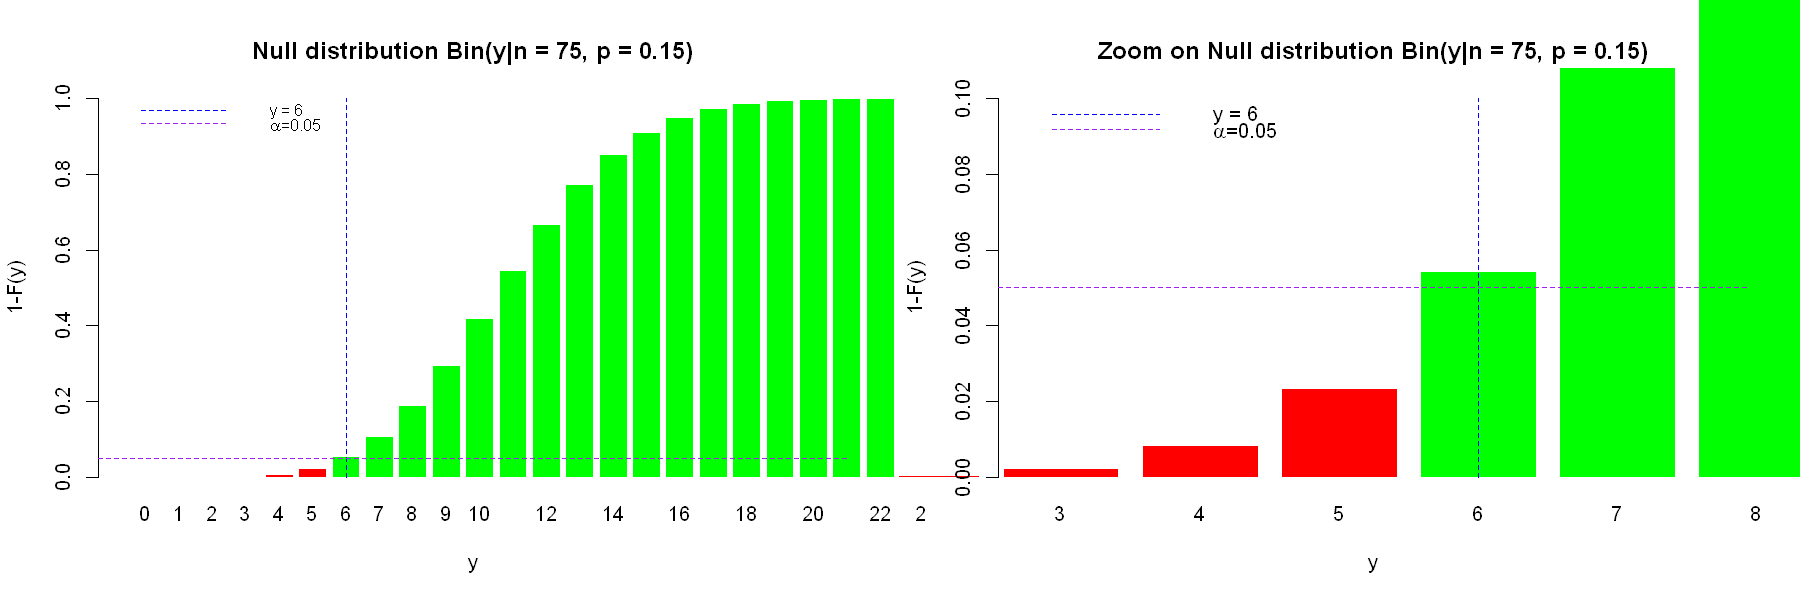

In [6]:
#e) Perform the same hypothesis test in the classical frequentist way.

options(repr.plot.width=15, repr.plot.height=5) 
par(mfrow= c(1,2))
y_range <- seq(from=0, to=n, by=1)
bin <- pbinom(y_range, n, p0)

colors   <- rep("red", n)
colors[y_range>=6] <- "green" 
bar <- barplot(bin,col=colors,xlab="y",ylab="1-F(y)",main="Null distribution Bin(y|n = 75, p = 0.15)", names.arg = y_range, border="white",xlim = c(0, 25),ylim=c(0,1))
abline(v=bar[y+1], col="blue",lty=2)
abline(h=alpha0, col="purple",lty=2)
legend("topleft",legend=c(paste("y =",y),expression(paste(alpha,"=0.05"))),lty=2, col=c("blue","purple"), bty='n',cex=0.8)
barplot(bin,col=colors,xlab="y",ylab="1-F(y)",main="Zoom on Null distribution Bin(y|n = 75, p = 0.15)", names.arg = y_range, border="white",xlim = c(4, 10),ylim=c(0,0.1))
abline(v=bar[y+1], col="blue",lty=2)
abline(h=alpha0, col="purple",lty=2)
legend("topleft",legend=c(paste("y =",y),expression(paste(alpha,"=0.05"))),lty=2, col=c("blue","purple"), bty='n')
glue("With the frequentist approach, the null hypotesis is accepted and therefore the new test is no better than the traditional one.")

## Exercise 2

In [7]:
#I create the dataframe with all the values
deaths <- c(0,1,2,3,4,5)
n1 <- c(109, 65, 22, 3, 1, 0)
n2 <- c(144, 91, 32, 11, 2, 0)
prussia <- data.frame(deaths, n1, n2)
prussia

deaths,n1,n2
0,109,144
1,65,91
2,22,32
3,3,11
4,1,2
5,0,0


In [8]:
#assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. 
#Determine the posterior mean, median and variance, and compute the 95% credibility interval.

samples <- 1000
range <- seq(from=20, to=60, by=1/samples) #range of λ values
colors <- c("deeppink","darkmagenta","lightskyblue","navyblue")

#I define a function for praticity:
lambda_analysis<- function(prior, obs,i){
    gauss <- vector() #I will collect inside this list the values of the mean and the var of the posterior 
    #for the comparison of the two set of mesurements
    n <- length(obs) #n. of death observed
    if (prior=="uniform"){
        k <- 1
    } else if (prior=="jeffrey"){
        k <- 0.5
    }
    #compute and plot the posterior distribution for λ
    alpha <- sum(obs)+k
    cat("\nAlpha is:",alpha)
    lambda <- n
    cat("\nLambda is:",lambda)
    post <- dgamma(range, alpha, n) 
    options(repr.plot.width=10, repr.plot.height=5) 
    lines(range, post, type="l", lwd=3, col=colors[i])
    grid()

    #Determine the posterior mean, median and variance
    #analytical analysis:
    mean_th <- alpha/n #mean of a gamma function
    var_th <- alpha/(n^2) #variance of a gamma function
    gauss[1] <- mean_th
    gauss[2] <- var_th
    #numerical analysis:
    mean_exp <- sum(range*post)/samples
    gauss[3] <- mean_exp
    var_exp <- sum((range^2)*post)/samples - (mean_exp^2)
    gauss[4] <- var_exp
    median_exp <- qgamma(0.5, alpha, n)
    err <- (abs(mean_exp-mean_th)/mean_th)*100
    cat("\n\nThe analytical analysis returns\nmean:",round(mean_th,digits=6),"+/-",round(sqrt(var_th),digits=6),"\nThe median can not be calculated analytically.\n\nThe numerical analysis returns:\nmean:",round(mean_exp,digits=6),"+/-",round(sqrt(var_exp),digits=6),"\nmedian:",round(median_exp,digits=6),"\n\nThe percentual error for the numerical mean in comparison with the analytical one is:",err,"%")

    #compute the 95% credibility interval
    l1 <- qgamma(0.025, alpha, n)
    gauss[5] <- l1
    l2 <- qgamma(0.975, alpha, n)
    gauss[6] <- l2
    l1_norm <- qnorm(0.025, mean_th, sqrt(var_th))
    l2_norm <- qnorm(0.975, mean_th, sqrt(var_th))
    err1 <- (abs(l1-l1_norm)/l1)*100
    err2 <- (abs(l2-l2_norm)/l2)*100
    cat("\n\nFor the Uniform Prior, the 95% credibility interval is: [",l1,",",l2,"].\n\nUsing a normal approximation, instead:[",l1_norm,",",l2_norm,"].\n\nThe errors of the two approximated limits are:","\nlower:",err1,"%\nupper:",err2,"%")
    lines(range,dnorm(range, mean_th, sqrt(var_th)),col=colors[i+1],lwd=2,lty=2)
    return(gauss)
    }

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

First measurement:
Alpha is: 201
Lambda is: 6

The analytical analysis returns
mean: 33.5 +/- 2.362908 
The median can not be calculated analytically.

The numerical analysis returns:
mean: 33.5 +/- 2.362908 
median: 33.44446 

The percentual error for the numerical mean in comparison with the analytical one is: 5.716369e-10 %

For the Uniform Prior, the 95% credibility interval is: [ 29.02861 , 38.287 ].

Using a normal approximation, instead:[ 28.86879 , 38.13121 ].

The errors of the two approximated limits are: 
lower: 0.5505665 %
upper: 0.4068816 %
---------------------------------------------
Second measurement:
Alpha is: 281
Lambda is: 6

The analytical analysis returns
mean: 46.83333 +/- 2.793842 
The median can not be calculated analytically.

The numerical analysis returns:
mean: 46.83292 +/- 2.796263 
median: 46.77779 

The percentual error for the numerical mean in comparison with the analytical one is: 0.0008763687 %

For the Uniform Prior, the 95% credibility interval is:

The mean is 13.33, the standard deviation 3.66

The 95% Bayesian credible interval for the mean is [6.16,20.51]

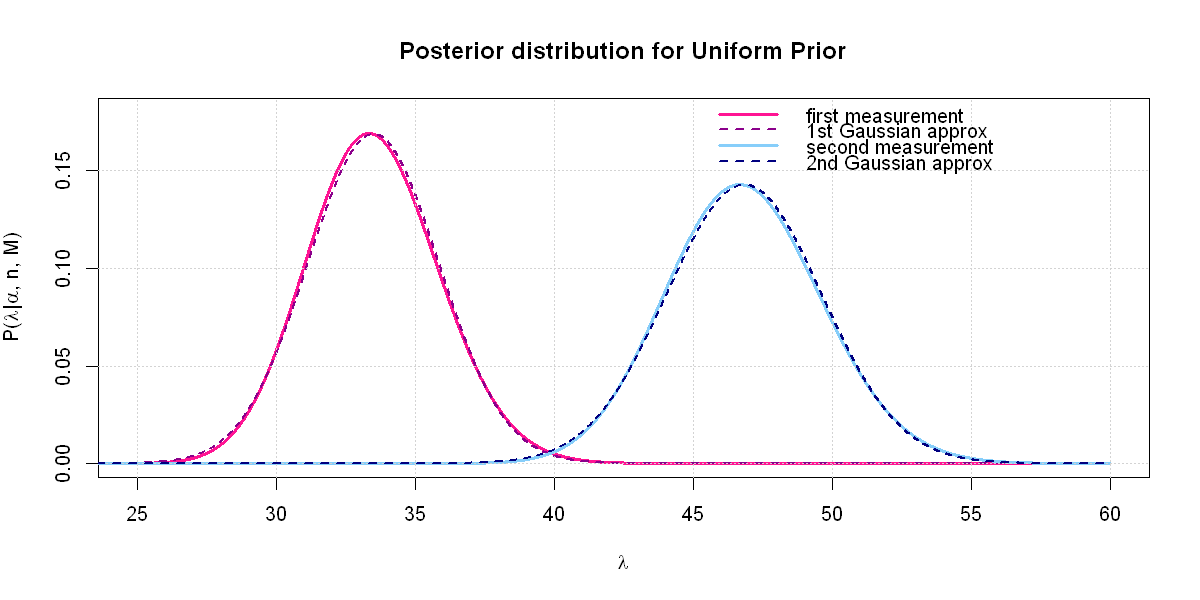

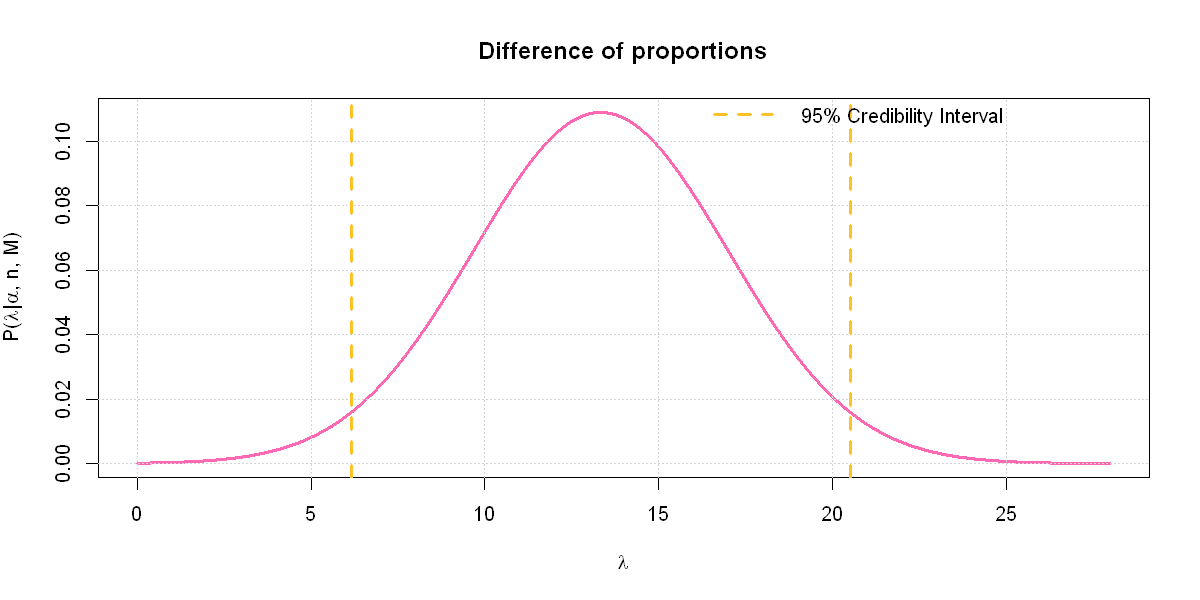

In [9]:
y_space <- seq(from=0,to=0.2,by=0.005/samples)
plot(range, y_space, type="n", lwd=3, main= paste("Posterior distribution for Uniform Prior"), 
     xlab=expression(lambda), ylab=expression(paste("P(",lambda,"|",alpha,", n, M)")),ylim=c(0,0.18),xlim=c(25,60))
cat("First measurement:")
first_set <- lambda_analysis("uniform",prussia$n1,1)
cat("\n---------------------------------------------\n")
cat("Second measurement:")
second_set <- lambda_analysis("uniform",prussia$n2,3)
legend("topright",legend=c("first measurement","1st Gaussian approx","second measurement","2nd Gaussian approx"), col=c("deeppink","darkmagenta","lightskyblue","navyblue"),lwd=c(3,2,3,2),lty=c(1,2,1,2),bty='n')

#COMPARISON OF THE TWO SETS USING GAUSSIAN APPROXIMATIONS
cat("\n---------------------------------------------\n")
cat("\nComparison of the two sets using Gaussian approximations:")
mu <- abs(first_set[1]-second_set[1])
var_c <- (first_set[2]+second_set[2])
mu0 <- round(mu,digits=2)
std <- round(var_c^0.5,digits=2)
glue("The mean is {mu0}, the standard deviation {std}")
l1 <- round(qnorm(0.025, mu, sqrt(var_c)),digits=2)
l2 <- round(qnorm(0.975, mu, sqrt(var_c)),digits=2)
glue("The 95% Bayesian credible interval for the mean is [{l1},{l2}]")
range0 <- seq(from=0, to=28, by=1/samples) #range of λ values
norm <- dnorm(range0, mu, sqrt(var_c))
plot(range0, norm, type="l", lwd=3, main= "Difference of proportions", xlab=expression(lambda), 
     ylab=expression(paste("P(",lambda,"|",alpha,", n, M)")), col="hotpink")
grid()
abline(v=l1,lty=2, col="goldenrod1",lwd=3)
abline(v=l2,lty=2, col="goldenrod1",lwd=3)
legend("topright", col="goldenrod1", lwd=3, legend="95% Credibility Interval", lty=2, bty='n')


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

First measurement:
Alpha is: 200.5
Lambda is: 6

The analytical analysis returns
mean: 33.41667 +/- 2.359967 
The median can not be calculated analytically.

The numerical analysis returns:
mean: 33.41667 +/- 2.359967 
median: 33.36113 

The percentual error for the numerical mean in comparison with the analytical one is: 7.446771e-10 %

For the Uniform Prior, the 95% credibility interval is: [ 28.95104 , 38.1979 ].

Using a normal approximation, instead:[ 28.79122 , 38.04212 ].

The errors of the two approximated limits are: 
lower: 0.5520498 %
upper: 0.4078237 %
---------------------------------------------
Second measurement:
Alpha is: 280.5
Lambda is: 6

The analytical analysis returns
mean: 46.75 +/- 2.791356 
The median can not be calculated analytically.

The numerical analysis returns:
mean: 46.74964 +/- 2.79347 
median: 46.69446 

The percentual error for the numerical mean in comparison with the analytical one is: 0.0007701339 %

For the Uniform Prior, the 95% credibility int

The mean is 13.33, the standard deviation 0.03

The 95% Bayesian credible interval for the mean is [6.17,20.5]

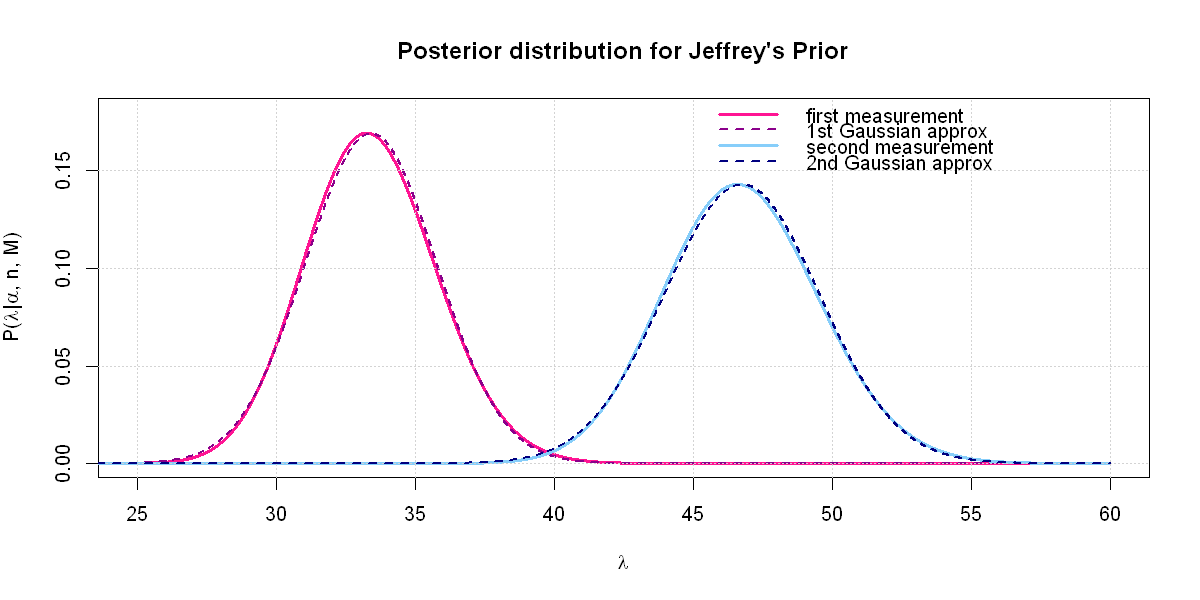

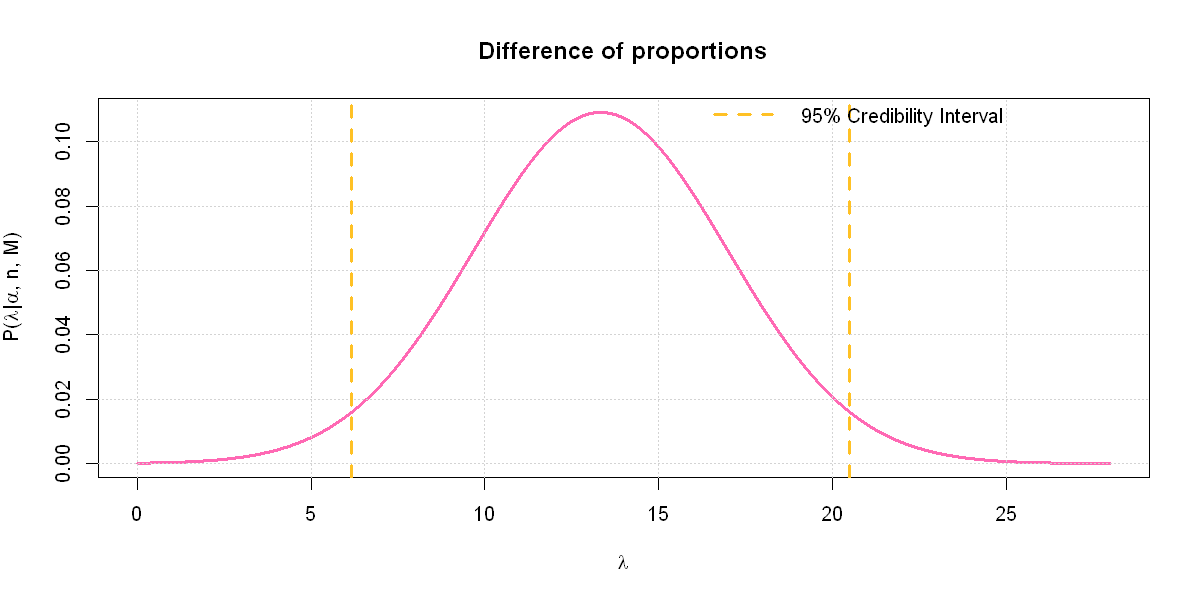

In [10]:
plot(range, y_space, type="n", lwd=3, main= paste("Posterior distribution for Jeffrey's Prior"), 
     xlab=expression(lambda), ylab=expression(paste("P(",lambda,"|",alpha,", n, M)")),ylim=c(0,0.18),xlim=c(25,60))
cat("First measurement:")
first_set_j <- lambda_analysis("jeffrey",prussia$n1,1)
cat("\n---------------------------------------------\n")
cat("Second measurement:")
second_set_j <- lambda_analysis("jeffrey",prussia$n2,3)
legend("topright",legend=c("first measurement","1st Gaussian approx","second measurement","2nd Gaussian approx"), col=c("deeppink","darkmagenta","lightskyblue","navyblue"),lwd=c(3,2,3,2),lty=c(1,2,1,2),bty='n')

#COMPARISON OF THE TWO SETS USING GAUSSIAN APPROXIMATIONS
cat("\n---------------------------------------------\n")
cat("\nComparison of the two sets using Gaussian approximations:")
mu <- abs(first_set_j[1]-second_set_j[1])
var_c <- (first_set_j[2]+second_set_j[2])
mu0 <- round(mu,digits=2)
std <- round(var^0.5,digits=2)
glue("The mean is {mu0}, the standard deviation {std}")
l1 <- round(qnorm(0.025, mu, sqrt(var_c)),digits=2)
l2 <- round(qnorm(0.975, mu, sqrt(var_c)),digits=2)
glue("The 95% Bayesian credible interval for the mean is [{l1},{l2}]")
range0 <- seq(from=0, to=28, by=1/samples) #range of λ values
norm <- dnorm(range0, mu, sqrt(var_c))
plot(range0, norm, type="l", lwd=3, main= "Difference of proportions", xlab=expression(lambda), 
     ylab=expression(paste("P(",lambda,"|",alpha,", n, M)")), col="hotpink")
grid()
abline(v=l1,lty=2, col="goldenrod1",lwd=3)
abline(v=l2,lty=2, col="goldenrod1",lwd=3)
legend("topright", col="goldenrod1", lwd=3, legend="95% Credibility Interval", lty=2, bty='n')

## Exercise 3

In [11]:
n <- 116 #number of samples taken from streams having a high environmental impact on pandas
y <- 11 #number of samples that had a high bacter X level.

In [12]:
#a) find the frequentist estimator for p

#the frequentist estimator of p is simply given by y/n
p_freq <- y/n
cat("The frequentist estimator for p is\np =",round(p_freq,digits=5))

The frequentist estimator for p is
p = 0.09483

In [13]:
#b) using a Beta(1, 10) prior for p, calculate and posterior distribution P(p|y)
alpha0 <- 1
beta0 <- 10

the posterior $P(p|y)$ is given by another Beta Distribution $Beta(p|\alpha',\beta')$ with
$$
\alpha'= \alpha +y
$$
$$
\beta'= \beta +n-y
$$

In [14]:
alpha <- alpha0+y
beta <- beta0+n-y
glue("The Posterior Distribution is P(p|a,b)=Beta(p|{alpha},{beta})")

The Posterior Distribution is P(p|a,b)=Beta(p|12,115)

In [15]:
#c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

#the bayesian estimator for p is the mean of the posterior distribution
p_bay_ = alpha/(alpha+beta)
cat("The bayesian estimator for p, which is also the posterior mean, is\np =",round(p_bay_,digits=5))
cat("\nThe percentage difference between the bayesian and the frequentist estimator is",round((2*abs(p_bay_-p_freq)/(p_bay_+p_freq))*100,digits=5),"%")

The bayesian estimator for p, which is also the posterior mean, is
p = 0.09449
The percentage difference between the bayesian and the frequentist estimator is 0.35855 %

the variance of a beta distribution $Beta(\alpha,\beta)$ is:
$$
var(X) = \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha+\beta +1)}
$$

In [16]:
var_beta_ = alpha*beta/((alpha+beta)^2*(alpha+beta+1))

#for the computation of the credible interval, I use the beta samplings of the distribution
ci1_ <- qbeta(0.025, alpha, beta)
ci2_ <- qbeta(0.975, alpha, beta)
one <- round(ci1_,digits=5)
two <- round(ci2_,digits=5)
cat("The variance of the posterior is",round(var_beta_,digits=5))
glue("The 95% credible interval is [{one},{two}]")

The variance of the posterior is 0.00067

The 95% credible interval is [0.05019,0.15084]

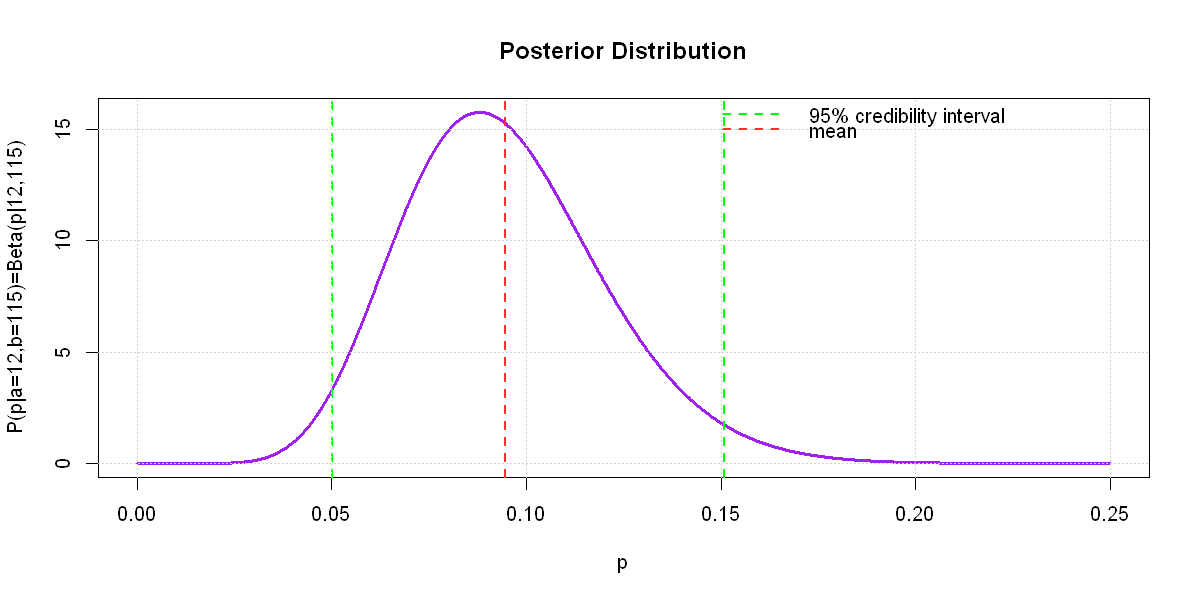

In [17]:
samp <- seq(from=0,to=0.25,by=0.0001)
plot(samp, dbeta(samp,alpha,beta, ncp = 0, log = FALSE),type="l",ylab="P(p|a=12,b=115)=Beta(p|12,115)", xlab="p",main="Posterior Distribution",col="purple",lwd=3)
abline(v=ci1_,col="green",lty=2,lwd=2)
abline(v=ci2_,col="green",lty=2,lwd=2)
abline(v=p_bay_,col="firebrick1",lty=2,lwd=2)
grid()
legend("topright",legend=c("95% credibility interval","mean"),col=c("green","firebrick1"),lwd=2,lty=2,bty="n")

In [18]:
#d) test the hypotesis H0 : p = 0.1 versus H1 : p =/= 0.1 at 5% level of significance 
#with both the frequentist and bayesian approach

p0 <- 0.1
a <- 0.05

### FREQUENTIST APPROACH
the null distribution is the sampling distribution of y: $Bin(y|n = 114, p = 0.1)$

If y belongs to [6,18], then the null hypotesis is accepted. Otherwise it is rejected.

Since y=11, the null hypotesis is accepted with 5% of significance

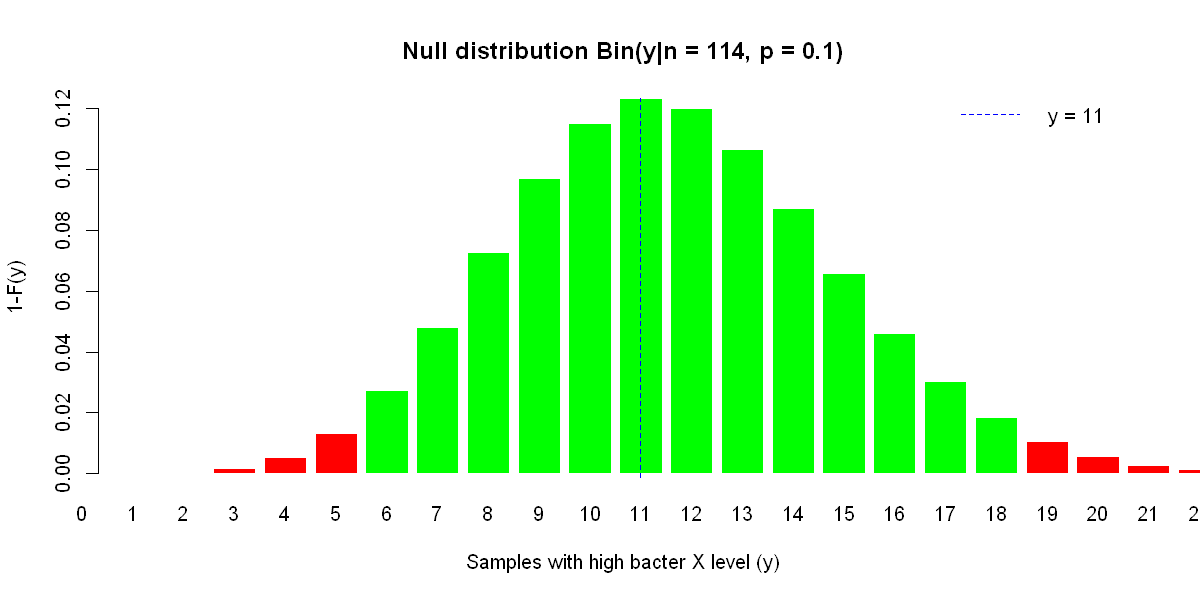

In [19]:
y_range <- seq(from=0, to=n, by=1)
samples <- Vectorize(function (x){
    a <- dbinom(x, n, p0)
    return (a)
    })
c1 <- qbinom(0.025, n, p0)
c2 <- qbinom(0.975, n, p0) 
glue("If y belongs to [{c1},{c2}], then the null hypotesis is accepted. Otherwise it is rejected.")
glue("Since y={y}, the null hypotesis is accepted with {(a)*100}% of significance")
colors   <- rep("red", n)
colors[y_range>=c1 & y_range<=c2] <- "green" 
bar <- barplot(samples(y_range),col=colors,xlab="Samples with high bacter X level (y)",ylab="1-F(y)",main="Null distribution Bin(y|n = 114, p = 0.1)", names.arg = y_range, border="white",xlim = c(2, 25))
abline(v=bar[y+1], col="blue",lty=2)
legend("topright",legend="y = 11",lty=2, col="blue", bty='n')

### BAYESIAN APPROACH

In [20]:
glue("The 95% credible interval for the posterior is [{one},{two}].")
glue("Since p={p0} belongs to this interval, then the null hypotesis is accepted with {a*100}% of significance")

The 95% credible interval for the posterior is [0.05019,0.15084].

Since p=0.1 belongs to this interval, then the null hypotesis is accepted with 5% of significance

### NEW MEASUREMENT

In [21]:
n <- 165 #number of samples taken from streams having a high environmental impact on pandas
y <- 9 #number of samples that had a high bacter X level.

In [22]:
#e) find the frequentist estimator for p

#the frequentist estimator of p is simply given by y/n
p_freq1 <- y/n
cat("The frequentist estimator for p is\np =",round(p_freq1,digits=5))

The frequentist estimator for p is
p = 0.05455

In [23]:
#f) find a bayesian estimator for p, assuming both a Beta(1, 10) prior for p, 
#and assuming the posterior probability of the older measurement as the prior for the new one.
#g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

glue("if Beta({alpha0},{beta0}) is the prior:" )
alpha1 <- alpha0+y
beta1 <- beta0+n-y
glue("The Posterior Distribution is Beta({alpha1},{beta1})")

#the bayesian estimator for p is the mean of the posterior distribution
p_bay1 = alpha1/(alpha1+beta1)
cat("The bayesian estimator for p is\np =",round(p_bay1,digits=5))
cat("\nThe percentage difference between the bayesian and the frequentist estimator is",round((2*abs(p_bay1-p_freq1)/(p_bay1+p_freq1))*100,digits=5),"%")

var_beta1 = alpha1*beta1/((alpha1+beta1)^2*(alpha1+beta1+1))

#for the computation of the credible interval, I use the beta samplings of the distribution
ci11 <- qbeta(0.025, alpha1, beta1)
ci21 <- qbeta(0.975, alpha1, beta1)
one1 <- round(ci11,digits=5)
two1 <- round(ci21,digits=5)
cat("\nThe variance of the posterior is",round(var_beta1,digits=5))
glue("The 95% credible interval is [{one1},{two1}]")
cat("-------------------------------------------")

glue("if Beta({alpha},{beta}) is the prior:" )
alpha2 <- alpha+y
beta2 <- beta+n-y
glue("The Posterior Distribution is Beta({alpha2},{beta2})")

#the bayesian estimator for p is the mean of the posterior distribution
p_bay2 = alpha2/(alpha2+beta2)
cat("The bayesian estimator for p is\np =",round(p_bay2,digits=5))
cat("\nThe percentage difference between the bayesian and the frequentist estimator is",round((2*abs(p_bay2-p_freq1)/(p_bay2+p_freq1))*100,digits=5),"%")

var_beta2 = alpha2*beta2/((alpha2+beta2)^2*(alpha2+beta2+1))

#for the computation of the credible interval, I use the beta samplings of the distribution
ci12 <- qbeta(0.025, alpha2, beta2)
ci22 <- qbeta(0.975, alpha2, beta2)
one2 <- round(ci12,digits=5)
two2 <- round(ci22,digits=5)
cat("\nThe variance of the posterior is",round(var_beta2,digits=5))
glue("The 95% credible interval is [{one2},{two2}]")

if Beta(1,10) is the prior:

The Posterior Distribution is Beta(10,166)

The bayesian estimator for p is
p = 0.05682
The percentage difference between the bayesian and the frequentist estimator is 4.08163 %
The variance of the posterior is 3e-04

The 95% credible interval is [0.02774,0.09538]

-------------------------------------------

if Beta(12,115) is the prior:

The Posterior Distribution is Beta(21,271)

The bayesian estimator for p is
p = 0.07192
The percentage difference between the bayesian and the frequentist estimator is 27.47415 %
The variance of the posterior is 0.00023

The 95% credible interval is [0.04522,0.10415]

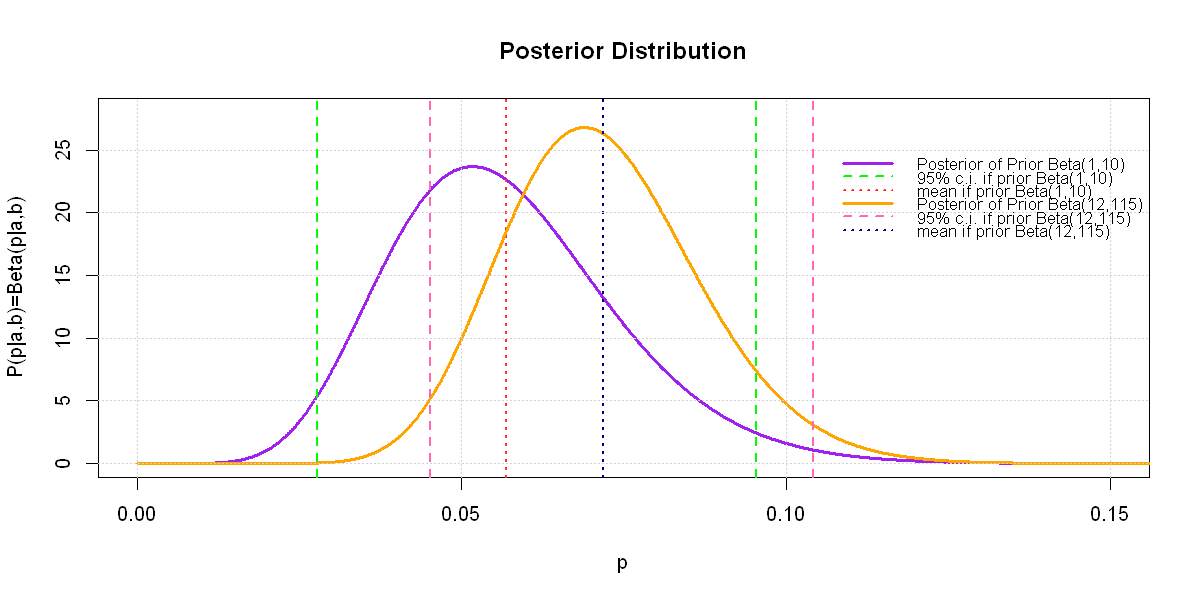

In [24]:
plot(samp, dbeta(samp,alpha1,beta1, ncp = 0, log = FALSE),type="l",ylab="P(p|a,b)=Beta(p|a,b)", xlab="p",main="Posterior Distribution",col="purple",lwd=3,ylim=c(0,28),xlim=c(0,0.15))
abline(v=ci11,col="green",lty=2,lwd=2)
abline(v=ci21,col="green",lty=2,lwd=2)
abline(v=p_bay1,col="firebrick1",lty=3,lwd=2)

lines(samp, dbeta(samp,alpha2,beta2, ncp = 0, log = FALSE),type="l",col="orange",lwd=3)
abline(v=ci12,col="hotpink",lty=2,lwd=2)
abline(v=ci22,col="hotpink",lty=2,lwd=2)
abline(v=p_bay2,col="navyblue",lty=3,lwd=2)

grid()
legend(0.105,25,legend=c("Posterior of Prior Beta(1,10)","95% c.i. if prior Beta(1,10)","mean if prior Beta(1,10)","Posterior of Prior Beta(12,115)","95% c.i. if prior Beta(12,115)","mean if prior Beta(12,115)"),
       col=c("purple","green","firebrick1","orange","hotpink","navyblue"),
       lwd=c(3,2,2,3,2,2),lty=c(1,2,3,1,2,3),bty="n",cex=0.85)

In [25]:
#h) test the hypotesis H0 : p = 0.1 versus H1 : p =/= 0.1 at 5% level of significance 
#with both the frequentist and bayesian approach

p0 <- 0.1
a <- 0.05

### FREQUENTIST APPROACH
the null distribution is the sampling distribution of y: $Bin(y|n = 165, p = 0.1)$

If y belongs to [9,24], then the null hypotesis is accepted. Otherwise it is rejected.

Since y=9, the null hypotesis is accepted with 95% of confidence.

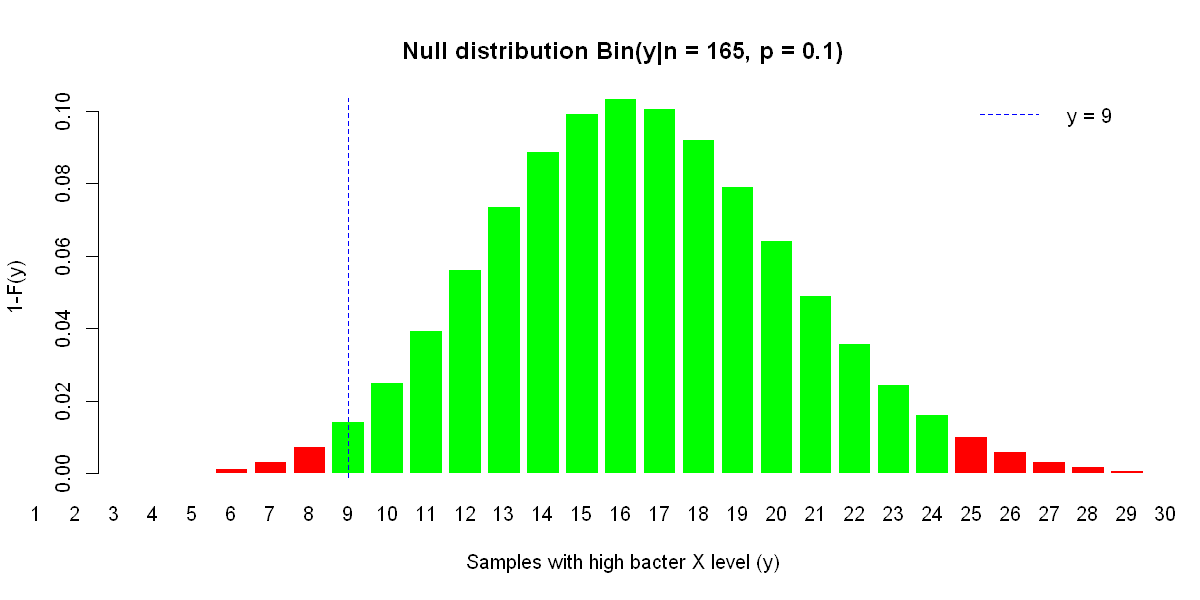

In [26]:
y_range <- seq(from=0, to=n, by=1)
c1 <- qbinom(0.025, n, p0)
c2 <- qbinom(0.975, n, p0) 
glue("If y belongs to [{c1},{c2}], then the null hypotesis is accepted. Otherwise it is rejected.")
glue("Since y={y}, the null hypotesis is accepted with {(1-a)*100}% of confidence.")
colors   <- rep("red", n)
colors[y_range>=c1 & y_range<=c2] <- "green" 
bar <- barplot(samples(y_range),col=colors,xlab="Samples with high bacter X level (y)",ylab="1-F(y)",main="Null distribution Bin(y|n = 165, p = 0.1)", names.arg = y_range, border="white",xlim = c(5, 35))
abline(v=bar[y+1], col="blue",lty=2)
legend("topright",legend="y = 9",lty=2, col="blue", bty='n')

### BAYESIAN APPROACH

In [27]:
glue("if Beta({alpha0},{beta0}) is the prior:" )
glue("The 95% credible interval for the posterior is [{one1},{two1}].")
glue("Since p={p0} does not belong to this interval, then the null hypotesis is rejected.")
cat("---------------------------------------------")
glue("if Beta({alpha1},{beta1}) is the prior:" )
glue("The 95% credible interval for the posterior is [{one2},{two2}].")
glue("Since p={p0} belongs to this interval, then the null hypotesis is accepted with {(a)*100}% of significance.")

if Beta(1,10) is the prior:

The 95% credible interval for the posterior is [0.02774,0.09538].

Since p=0.1 does not belong to this interval, then the null hypotesis is rejected.

---------------------------------------------

if Beta(10,166) is the prior:

The 95% credible interval for the posterior is [0.04522,0.10415].

Since p=0.1 belongs to this interval, then the null hypotesis is accepted with 5% of significance.

## Exercise 4

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 1
   Total graph size: 15

Initializing model




Iterations = 101001:201000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 1e+05 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     8.489e-02      3.088e-02      9.765e-05      1.340e-04 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
0.03479 0.06258 0.08136 0.10346 0.15440 


The percentage difference between the mean found manually and the mean found with MCMC is: 0.1171294 %
The percentage difference between the two stds is: 0.07688096 %

The distribution found for the posterior is equivalent to a Beta(7,75), as in exercise 1.

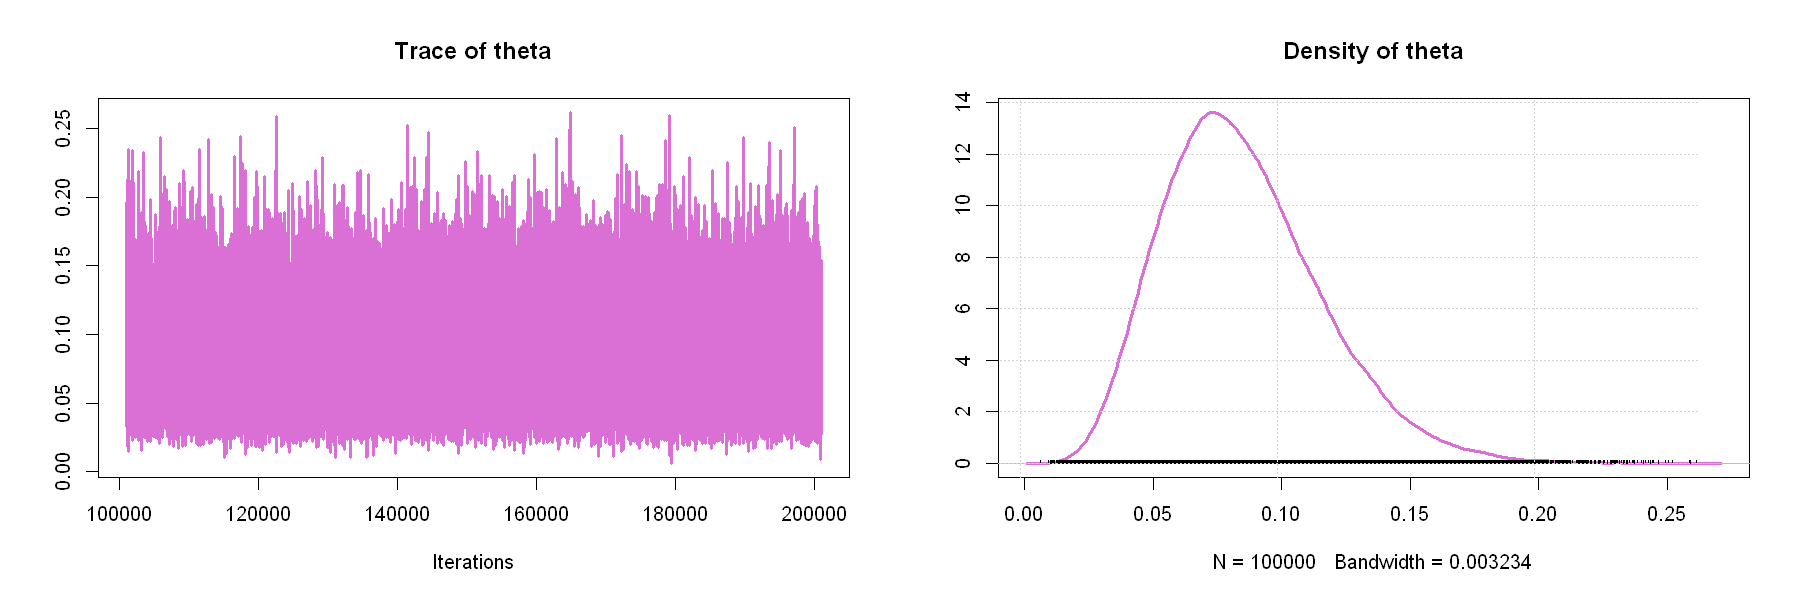

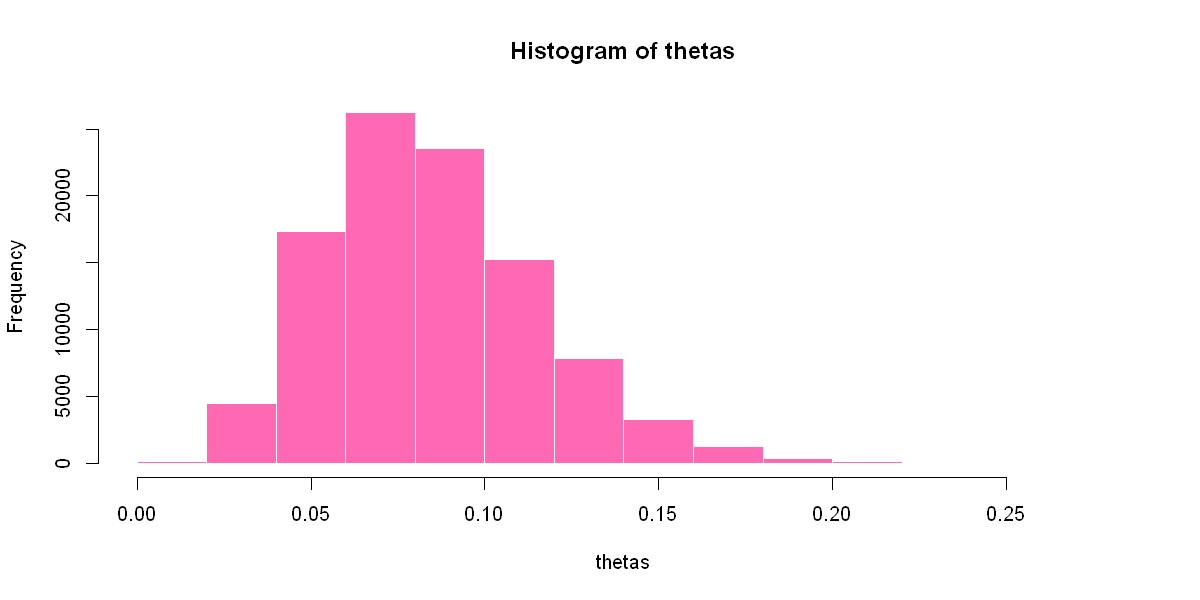

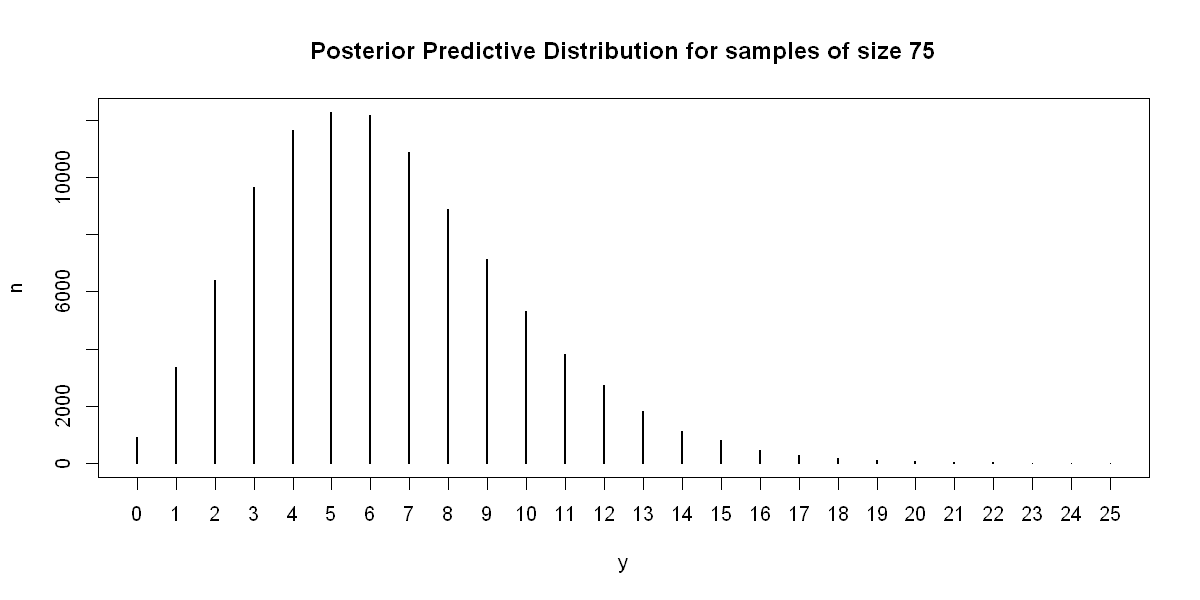

In [28]:
#setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 
#and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot the mean value and variance

#Load the data
y <- 6
n <- 75

string <- "model{
    # Likelihood
    y ~ dbinom(theta, n)

    # Prior
    theta ~ dbeta(alpha, beta)
    alpha <- ((1-mu)*mu^2)/(std^2)-mu # prior successes
    beta <- alpha/mu - alpha # prior failures
    mu <- 0.15
    std <- 0.14

}"

dataList = list(y = y, n = n)

model <- jags.model(file = textConnection(string), 
                    data = dataList)

update(model, n.iter = 100000)
Nrep = 100000 # number of values to simulate

posterior_sample <- coda.samples(model,
                       variable.names = c("theta"),
                       n.iter = Nrep)

collect <- summary(posterior_sample)
collect
mean_new <- collect$statistics["Mean"]
std_new <- collect$statistics["SD"]
diff_mu <- (2*abs(mean_new-mean)/(mean_new+mean))*100
diff_var <- (2*abs(std_new-sqrt(var))/(std_new+sqrt(var)))*100

cat("The percentage difference between the mean found manually and the mean found with MCMC is:",diff_mu,
    "%\nThe percentage difference between the two stds is:",diff_var,"%")

a <- round(((1-mean_new)*mean_new^2)/(std_new^2)-mean_new,digits=0)
b <- round(a/mean_new - a,digits=0)
glue("The distribution found for the posterior is equivalent to a Beta({a},{b}), as in exercise 1.")

options(repr.plot.width=15, repr.plot.height=5) 
plot(posterior_sample,col="orchid",lwd=3)
grid()

options(repr.plot.width=10, repr.plot.height=5) 
thetas = as.matrix(posterior_sample,lwd=3)
hist(thetas,col="hotpink", border="white")

ynew = rbinom(Nrep, n, thetas)

plot(table(ynew),
     main = "Posterior Predictive Distribution for samples of size 75",
     xlab = "y", ylab="n")


## Exercise 5

### First set, Uniform Prior

Warning message in jags.model(file = textConnection(model_string1), data = data):
"Unused variable "n" in data"

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 6
   Unobserved stochastic nodes: 1
   Total graph size: 8

Initializing model




Iterations = 10001:20000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      33.48158        2.32342        0.02323        0.02323 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
29.06 31.87 33.43 35.03 38.22 


The percentage difference between the mean found manually and the mean found with MCMC is: 0.05500863 %
The percentage difference between the two stds is: 1.685171 %
The percentage difference of the two limits of the credibility intervals are, respectively: 0.09495149 % and 0.1696412 %

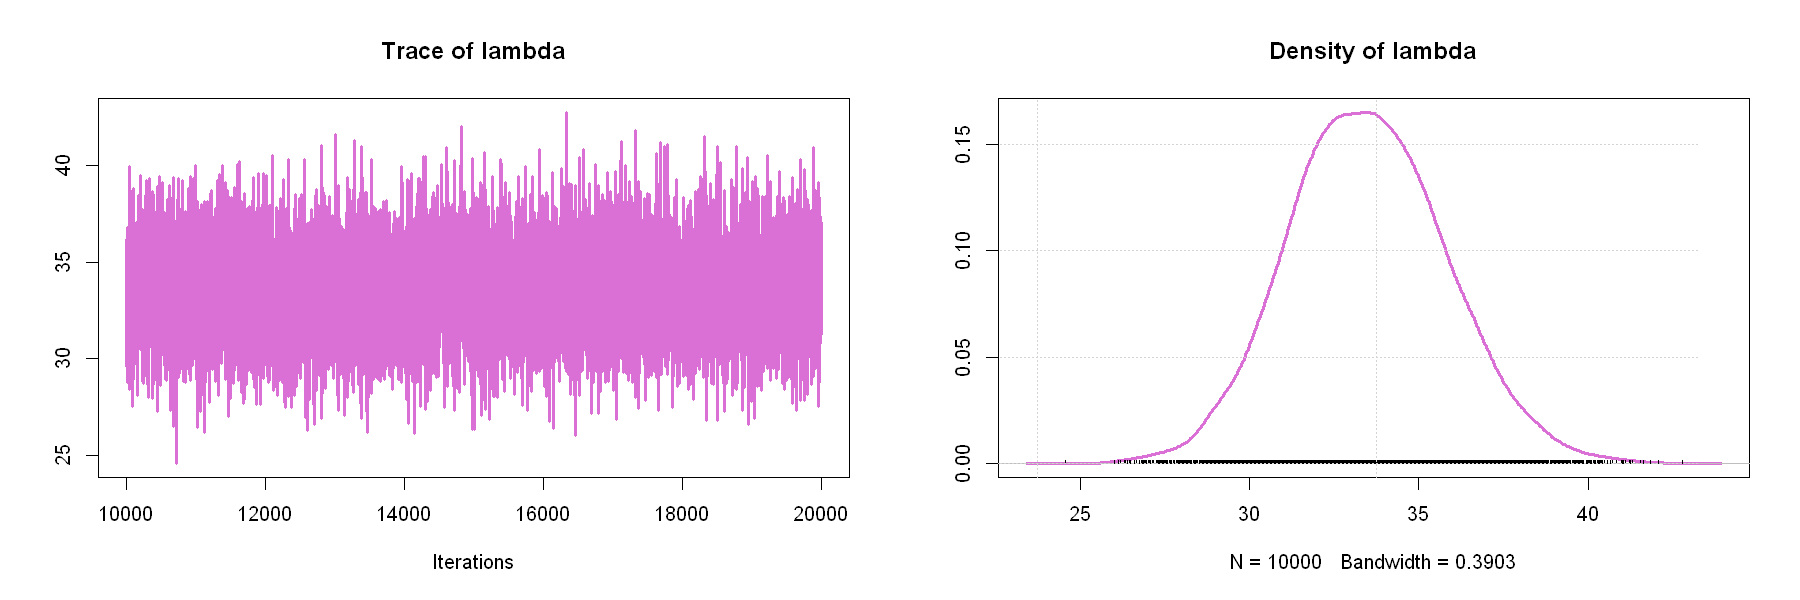

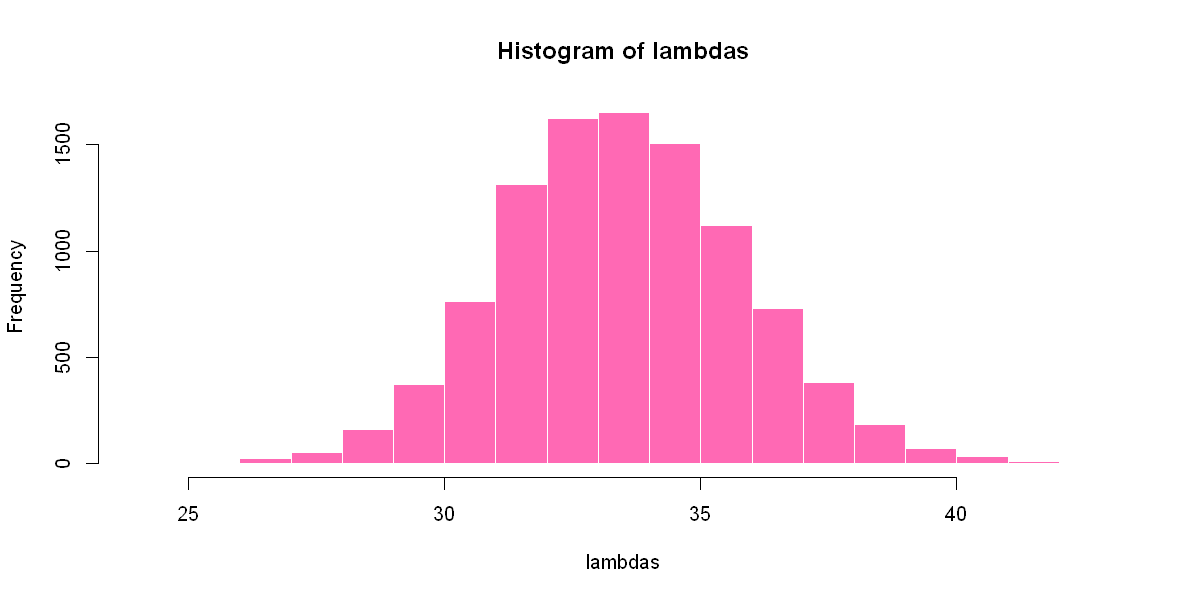

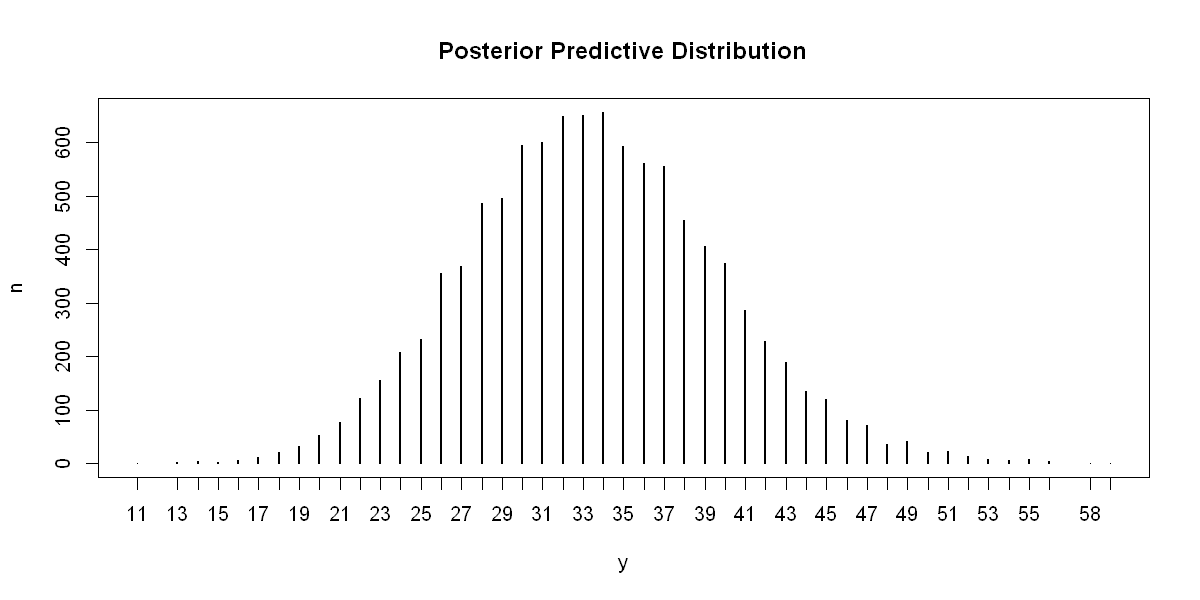

In [29]:
model_string1 <- "model{
    # Likelihood
    for (i in 1:6) {
       X[i] ~ dpois(lambda); 
    }
        
    # Uniform Prior for lambda
    lambda ~ dexp(0.00001);
}"

data <- NULL
data$X <- prussia$n1 
data$n <- length(data$X)

model <- jags.model(file = textConnection(model_string1), 
                    data = data)

update(model, n.iter = 10000)
Nrep = 10000 # number of values to simulate

posterior_sample <- coda.samples(model,
                       variable.names = c("lambda"),
                       n.iter = Nrep)

collect <- summary(posterior_sample)
collect
mean_new <- collect$statistics["Mean"]
std_new <- collect$statistics["SD"]
interval1 <- collect$quantiles["2.5%"]
interval2 <- collect$quantiles["97.5%"]
diff_mu <- (2*abs(mean_new-first_set[3])/(mean_new+first_set[3]))*100
diff_var <- (2*abs(std_new-sqrt(first_set[4]))/(std_new+sqrt(first_set[4])))*100
q1 <- (2*abs(interval1-first_set[5])/(interval1+first_set[5]))*100
q2 <- (2*abs(interval2-first_set[6])/(interval2+first_set[6]))*100
cat("The percentage difference between the mean found manually and the mean found with MCMC is:",diff_mu,
    "%\nThe percentage difference between the two stds is:",diff_var,
    "%\nThe percentage difference of the two limits of the credibility intervals are, respectively:",q1,"% and",q2,"%")

options(repr.plot.width=15, repr.plot.height=5) 
plot(posterior_sample,col="orchid",lwd=3)
grid()

options(repr.plot.width=10, repr.plot.height=5) 
lambdas = as.matrix(posterior_sample,lwd=3)
hist(lambdas,col="hotpink", border="white")

ynew = rpois(Nrep, lambdas)

plot(table(ynew),
     main = "Posterior Predictive Distribution",
     xlab = "y", ylab="n")

### Second Set, Uniform Prior

Warning message in jags.model(file = textConnection(model_string2), data = data):
"Unused variable "n" in data"

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 6
   Unobserved stochastic nodes: 1
   Total graph size: 8

Initializing model




Iterations = 10001:20000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      46.78143        2.78136        0.02781        0.02781 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
41.48 44.89 46.74 48.60 52.35 


The percentage difference between the mean found manually and the mean found with MCMC is: 0.1100099 %
The percentage difference between the two stds is: 0.5342237 %
The percentage difference of the two limits of the credibility intervals are, respectively: 0.1005923 % and 0.2257754 %

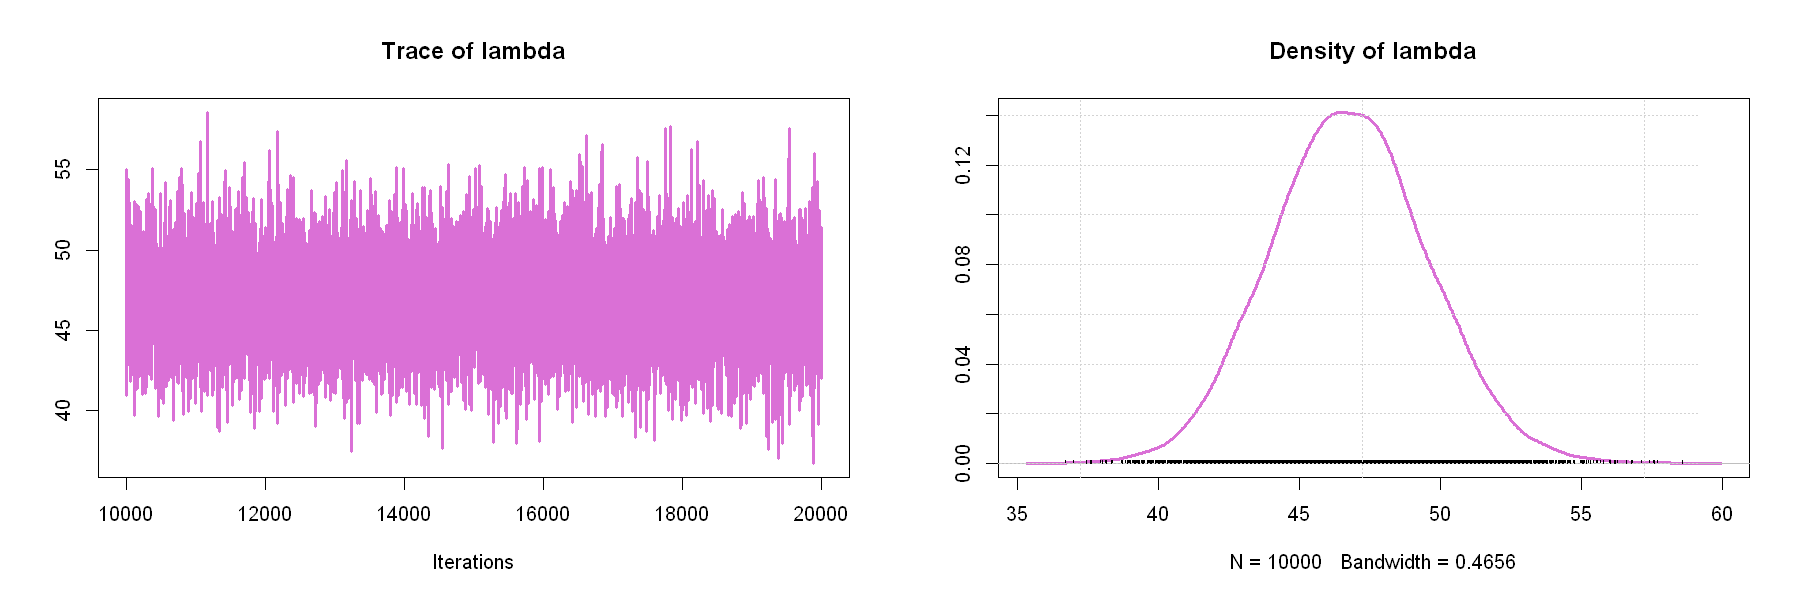

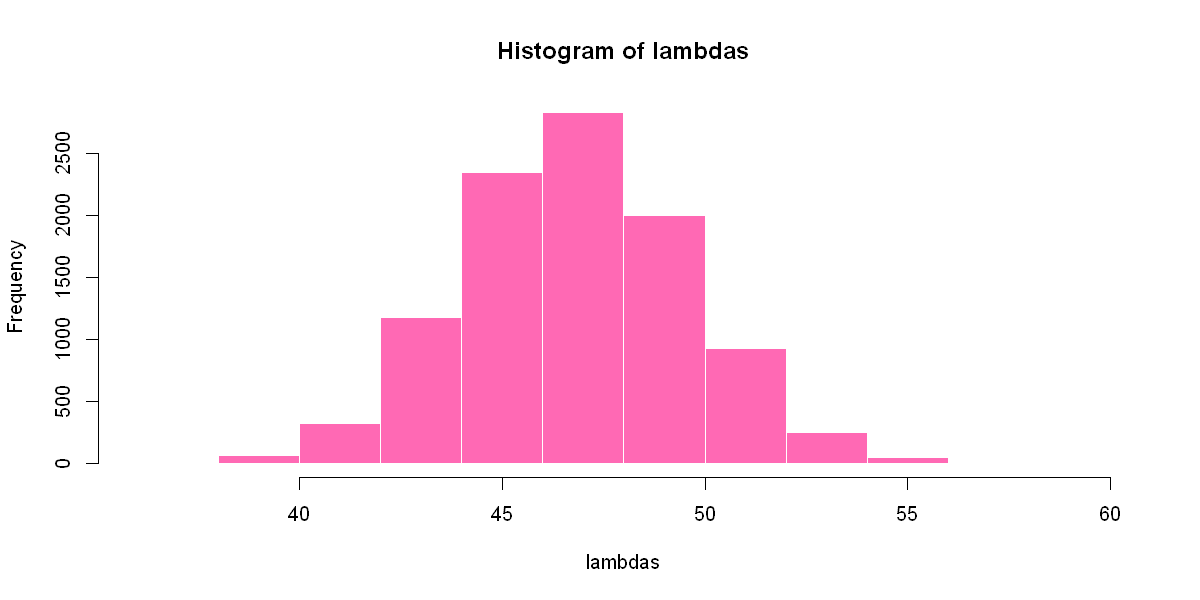

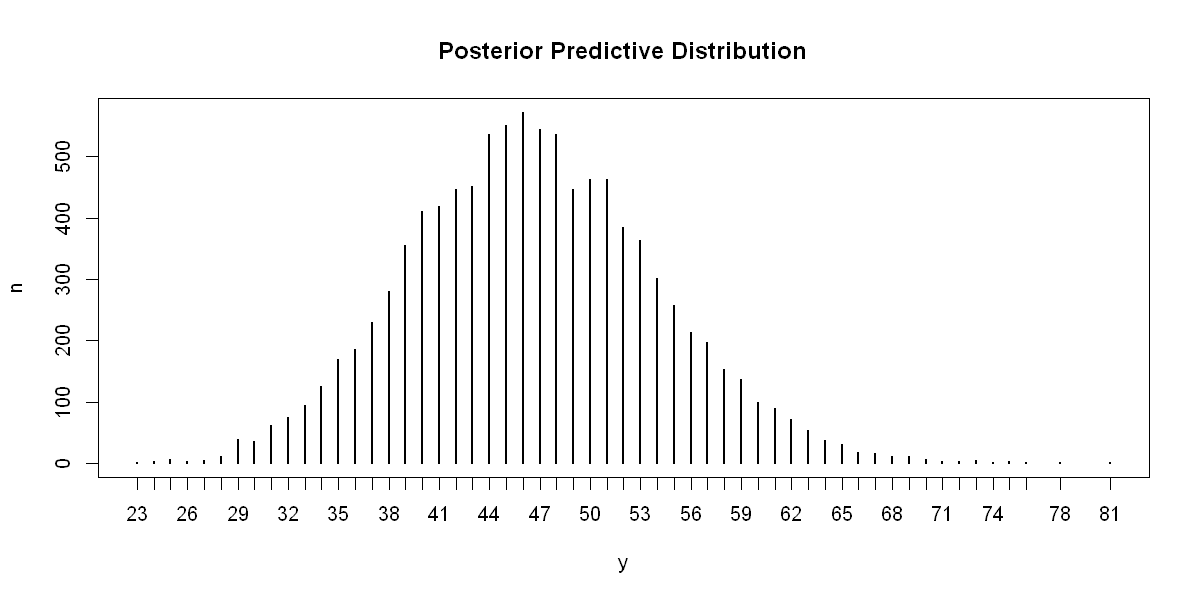

In [30]:
model_string2 <- "model{
    # Likelihood
    for (i in 1:6) {
       X[i] ~ dpois(lambda); 
    }
        
    # Uniform Prior for lambda
    lambda ~ dexp(0.00001);
}"

data <- NULL
data$X <- prussia$n2 
data$n <- length(data$X)

model <- jags.model(file = textConnection(model_string2), 
                    data = data)

update(model, n.iter = 10000)
Nrep = 10000 # number of values to simulate

posterior_sample <- coda.samples(model,
                       variable.names = c("lambda"),
                       n.iter = Nrep)

collect <- summary(posterior_sample)
collect
mean_new <- collect$statistics["Mean"]
std_new <- collect$statistics["SD"]
interval1 <- collect$quantiles["2.5%"]
interval2 <- collect$quantiles["97.5%"]
diff_mu <- (2*abs(mean_new-second_set[3])/(mean_new+second_set[3]))*100
diff_var <- (2*abs(std_new-sqrt(second_set[4]))/(std_new+sqrt(second_set[4])))*100
q1 <- (2*abs(interval1-second_set[5])/(interval1+second_set[5]))*100
q2 <- (2*abs(interval2-second_set[6])/(interval2+second_set[6]))*100
cat("The percentage difference between the mean found manually and the mean found with MCMC is:",diff_mu,
    "%\nThe percentage difference between the two stds is:",diff_var,
    "%\nThe percentage difference of the two limits of the credibility intervals are, respectively:",q1,"% and",q2,"%")

options(repr.plot.width=15, repr.plot.height=5) 
plot(posterior_sample,col="orchid",lwd=3)
grid()

options(repr.plot.width=10, repr.plot.height=5) 
lambdas = as.matrix(posterior_sample,lwd=3)
hist(lambdas,col="hotpink", border="white")

ynew = rpois(Nrep, lambdas)

plot(table(ynew),
     main = "Posterior Predictive Distribution",
     xlab = "y", ylab="n")

### First Set, Jeffrey's Prior

Warning message in jags.model(file = textConnection(model_string3), data = data):
"Unused variable "n" in data"

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 6
   Unobserved stochastic nodes: 1
   Total graph size: 8

Initializing model




Iterations = 10001:20000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      33.32226        2.35642        0.02356        0.02356 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
28.90 31.69 33.26 34.87 38.12 


The percentage difference between the mean found manually and the mean found with MCMC is: 0.2829003 %
The percentage difference between the two stds is: 0.1505631 %
The percentage difference of the two limits of the credibility intervals are, respectively: 0.1645625 % and 0.1996081 %

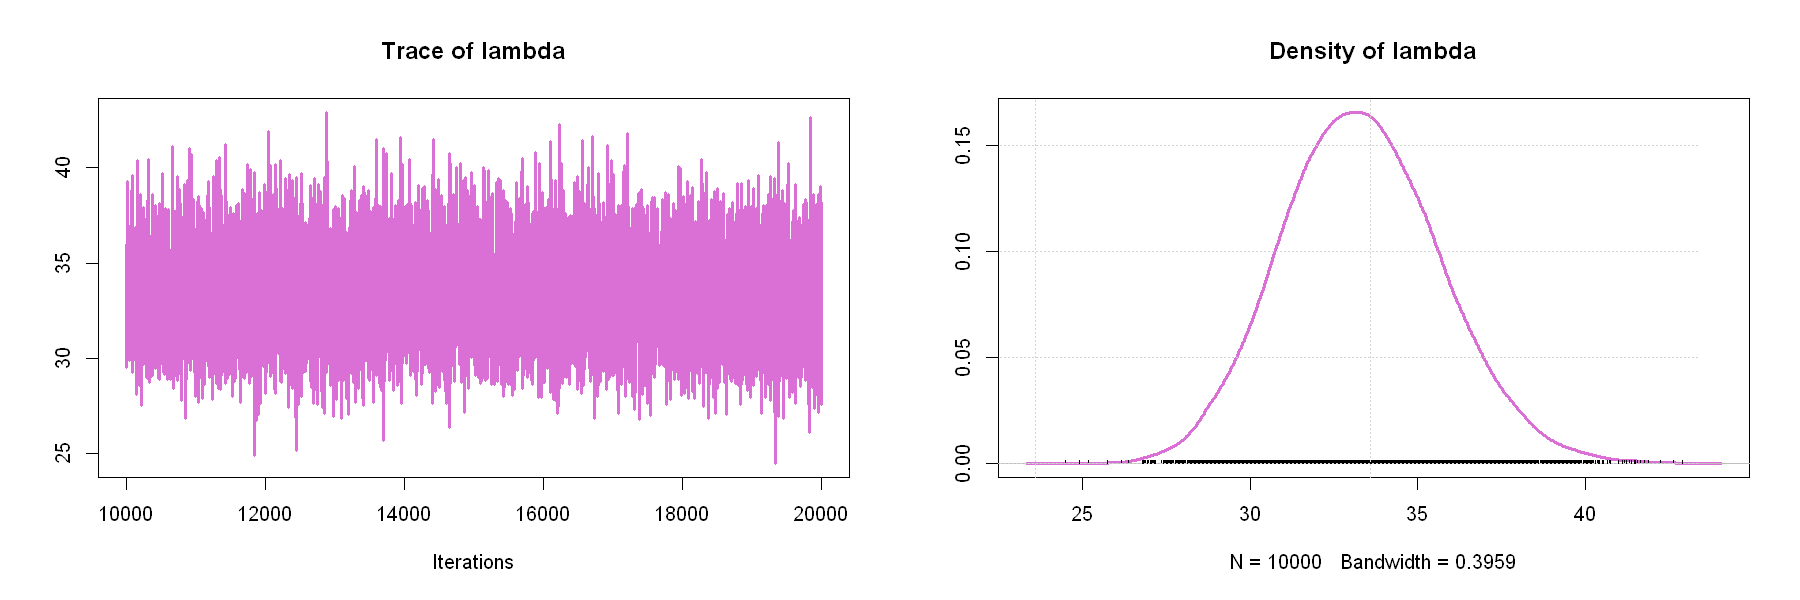

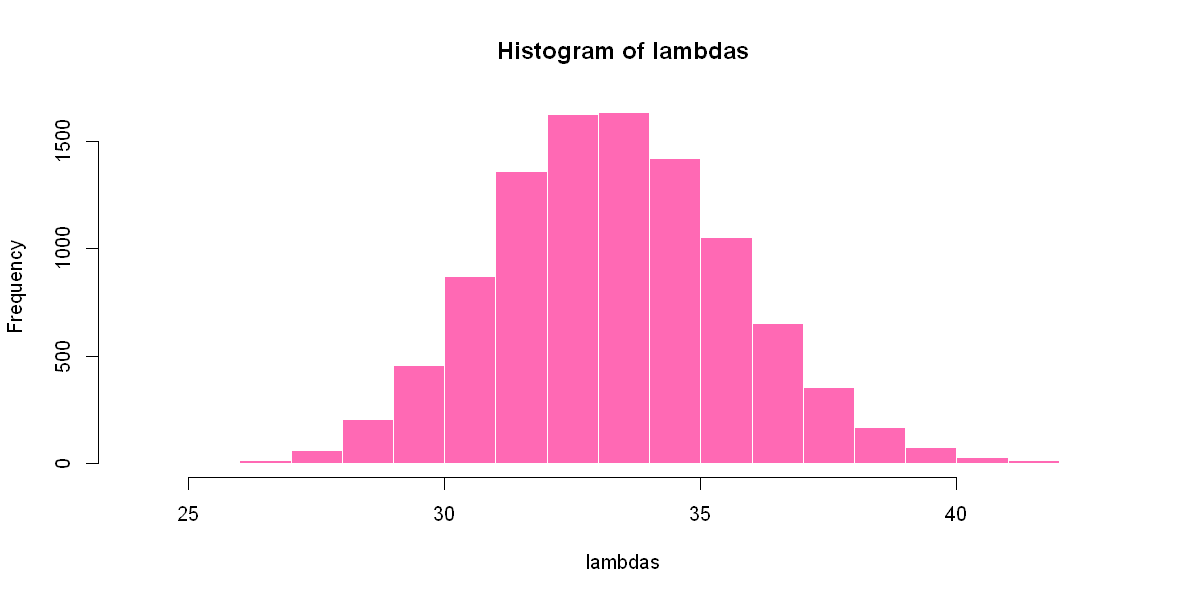

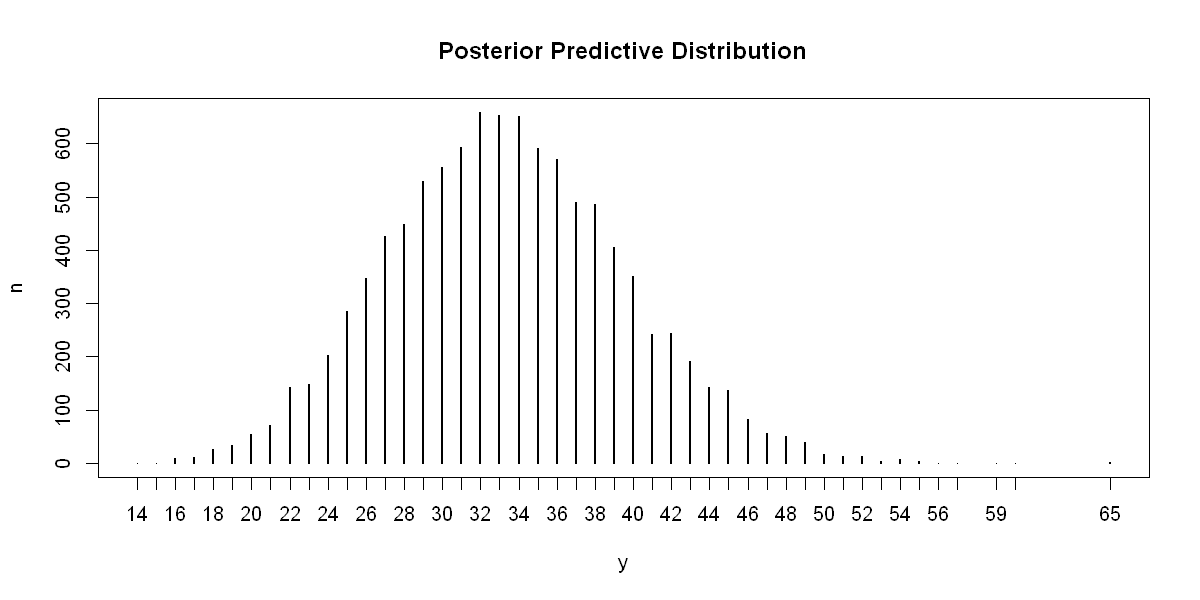

In [31]:
model_string3 <- "model{
    # Likelihood
    for (i in 1:6) {
       X[i] ~ dpois(lambda); 
    }
        
    # Jeffrey's Prior for lambda
    lambda ~ dgamma(0.00001,0.00001);
}"

data <- NULL
data$X <- prussia$n1 
data$n <- length(data$X)

model <- jags.model(file = textConnection(model_string3), 
                    data = data)

update(model, n.iter = 10000)
Nrep = 10000 # number of values to simulate

posterior_sample <- coda.samples(model,
                       variable.names = c("lambda"),
                       n.iter = Nrep)

collect <- summary(posterior_sample)
collect
mean_new <- collect$statistics["Mean"]
std_new <- collect$statistics["SD"]
interval1 <- collect$quantiles["2.5%"]
interval2 <- collect$quantiles["97.5%"]
diff_mu <- (2*abs(mean_new-first_set_j[3])/(mean_new+first_set_j[3]))*100
diff_var <- (2*abs(std_new-sqrt(first_set_j[4]))/(std_new+sqrt(first_set_j[4])))*100
q1 <- (2*abs(interval1-first_set_j[5])/(interval1+first_set_j[5]))*100
q2 <- (2*abs(interval2-first_set_j[6])/(interval2+first_set_j[6]))*100
cat("The percentage difference between the mean found manually and the mean found with MCMC is:",diff_mu,
    "%\nThe percentage difference between the two stds is:",diff_var,
    "%\nThe percentage difference of the two limits of the credibility intervals are, respectively:",q1,"% and",q2,"%")

options(repr.plot.width=15, repr.plot.height=5) 
plot(posterior_sample,col="orchid",lwd=3)
grid()

options(repr.plot.width=10, repr.plot.height=5) 
lambdas = as.matrix(posterior_sample,lwd=3)
hist(lambdas,col="hotpink", border="white")

ynew = rpois(Nrep, lambdas)

plot(table(ynew),
     main = "Posterior Predictive Distribution",
     xlab = "y", ylab="n")

### Second Set, Jeffrey's Prior

Warning message in jags.model(file = textConnection(model_string2), data = data):
"Unused variable "n" in data"

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 6
   Unobserved stochastic nodes: 1
   Total graph size: 8

Initializing model




Iterations = 10001:20000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      46.67801        2.75892        0.02759        0.02759 

2. Quantiles for each variable:

 2.5%   25%   50%   75% 97.5% 
41.43 44.81 46.63 48.48 52.35 


The percentage difference between the mean found manually and the mean found with MCMC is: 0.1533334 %
The percentage difference between the two stds is: 1.244547 %
The percentage difference of the two limits of the credibility intervals are, respectively: 0.01270993 % and 0.04452935 %

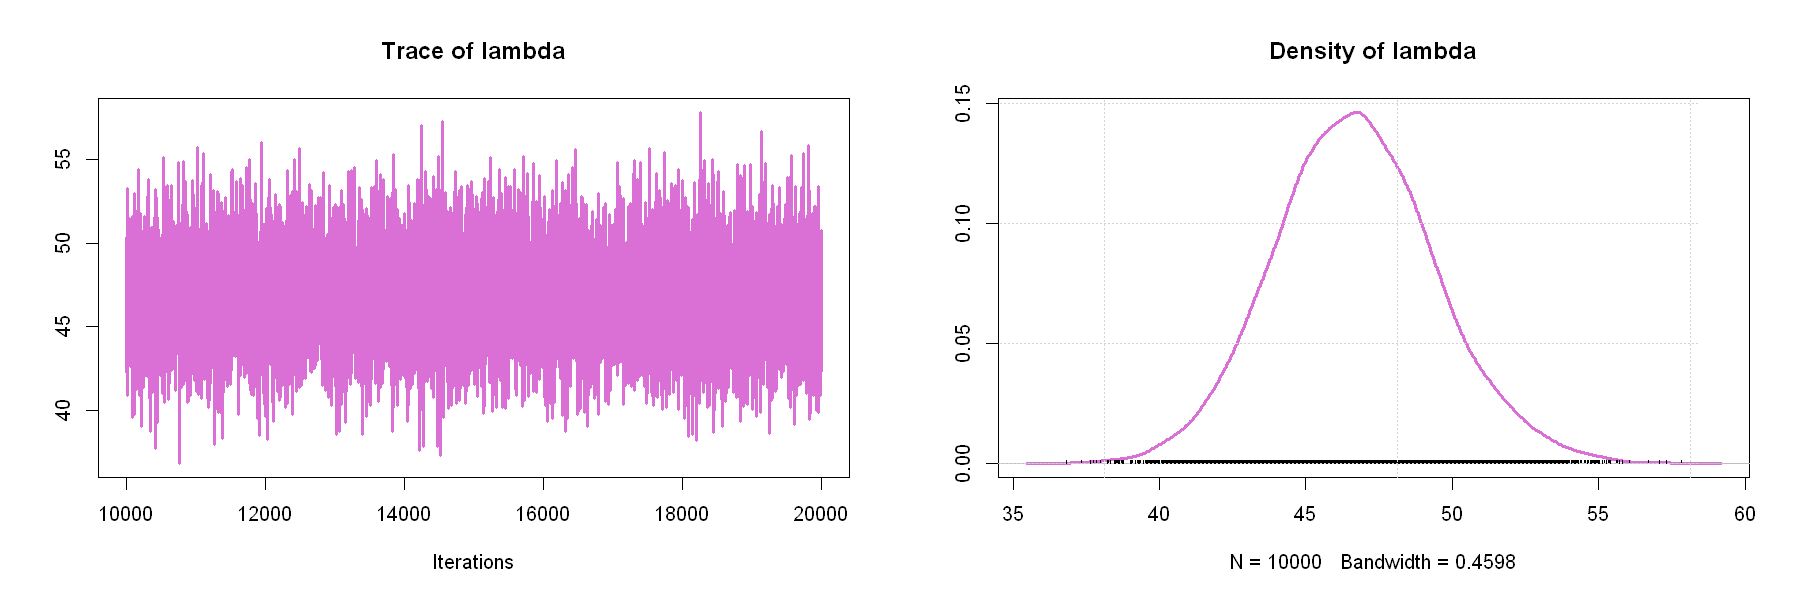

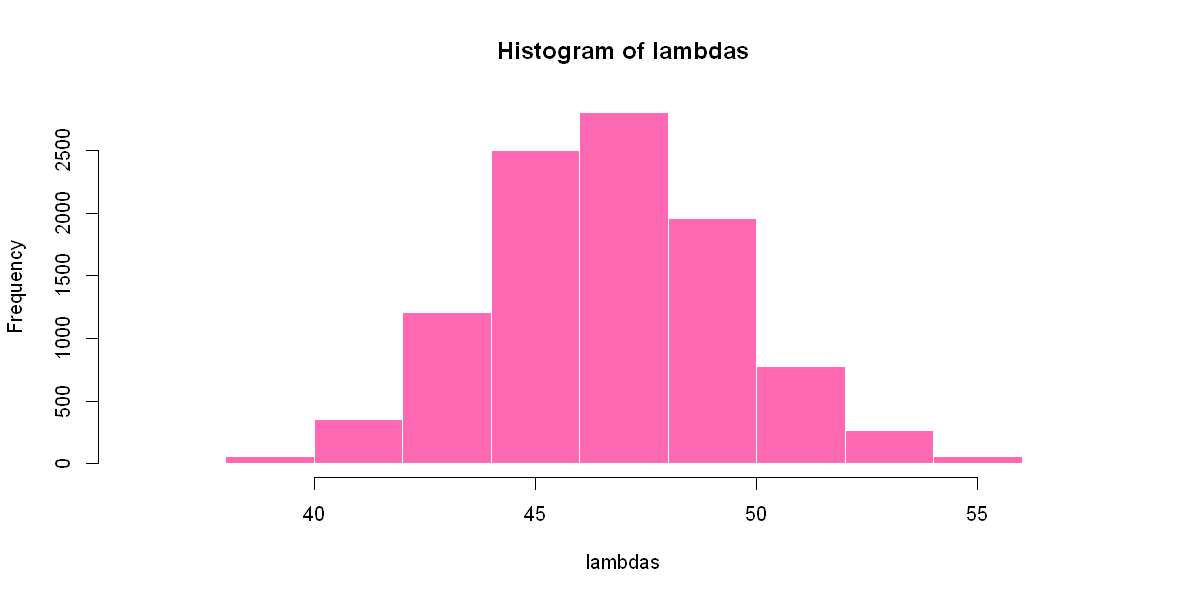

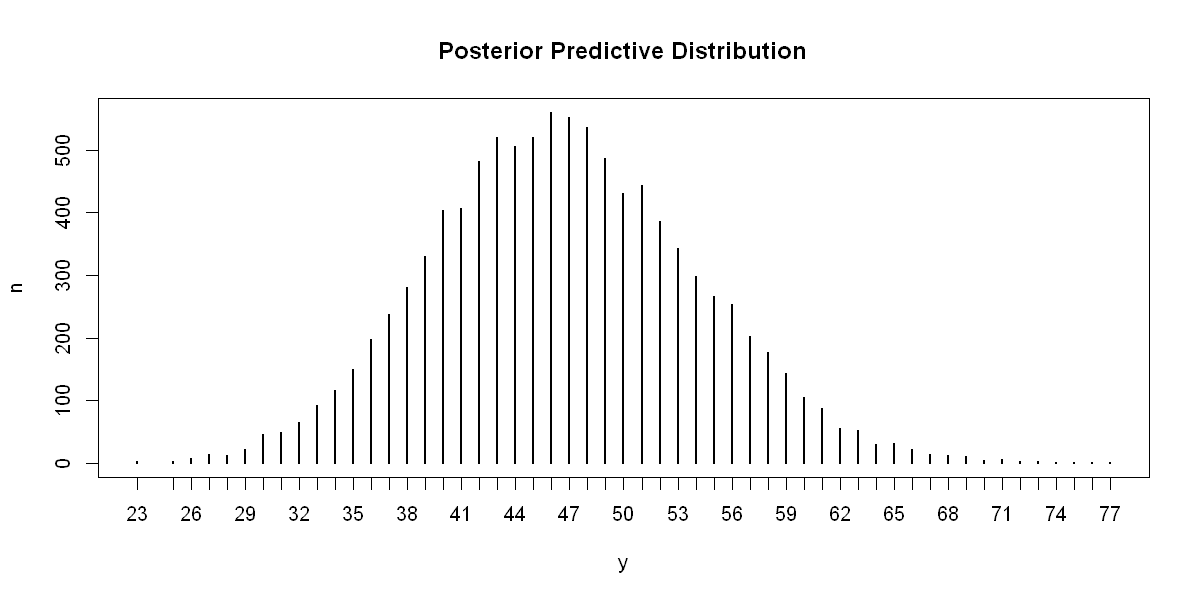

In [32]:
model_string2 <- "model{
    # Likelihood
    for (i in 1:6) {
       X[i] ~ dpois(lambda); 
    }
        
    # Uniform Prior for lambda
    lambda ~ dgamma(0.00001,0.00001);
}"

data <- NULL
data$X <- prussia$n2 
data$n <- length(data$X)

model <- jags.model(file = textConnection(model_string2), 
                    data = data)

update(model, n.iter = 10000)
Nrep = 10000 # number of values to simulate

posterior_sample <- coda.samples(model,
                       variable.names = c("lambda"),
                       n.iter = Nrep)

collect <- summary(posterior_sample)
collect
mean_new <- collect$statistics["Mean"]
std_new <- collect$statistics["SD"]
interval1 <- collect$quantiles["2.5%"]
interval2 <- collect$quantiles["97.5%"]
diff_mu <- (2*abs(mean_new-second_set_j[3])/(mean_new+second_set_j[3]))*100
diff_var <- (2*abs(std_new-sqrt(second_set_j[4]))/(std_new+sqrt(second_set_j[4])))*100
q1 <- (2*abs(interval1-second_set_j[5])/(interval1+second_set_j[5]))*100
q2 <- (2*abs(interval2-second_set_j[6])/(interval2+second_set_j[6]))*100
cat("The percentage difference between the mean found manually and the mean found with MCMC is:",diff_mu,
    "%\nThe percentage difference between the two stds is:",diff_var,
    "%\nThe percentage difference of the two limits of the credibility intervals are, respectively:",q1,"% and",q2,"%")

options(repr.plot.width=15, repr.plot.height=5) 
plot(posterior_sample,col="orchid",lwd=3)
grid()

options(repr.plot.width=10, repr.plot.height=5) 
lambdas = as.matrix(posterior_sample,lwd=3)
hist(lambdas,col="hotpink", border="white")

ynew = rpois(Nrep, lambdas)

plot(table(ynew),
     main = "Posterior Predictive Distribution",
     xlab = "y", ylab="n")

## Exercise 6

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 1
   Total graph size: 5

Initializing model




Iterations = 11001:111000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 1e+05 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
     9.446e-02      2.570e-02      8.128e-05      1.073e-04 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
0.05039 0.07605 0.09236 0.11077 0.15026 


The percentage difference between the mean found manually and the mean found with MCMC is: 0.0251791 %
The percentage difference between the two stds is: 0.5856796 %
The percentage difference of the two limits of the credibility intervals are, respectively: 0.4112085 % and 0.3811952 %

The distribution found for the posterior is equivalent to a Beta(12,115), as found in the exercise 3.

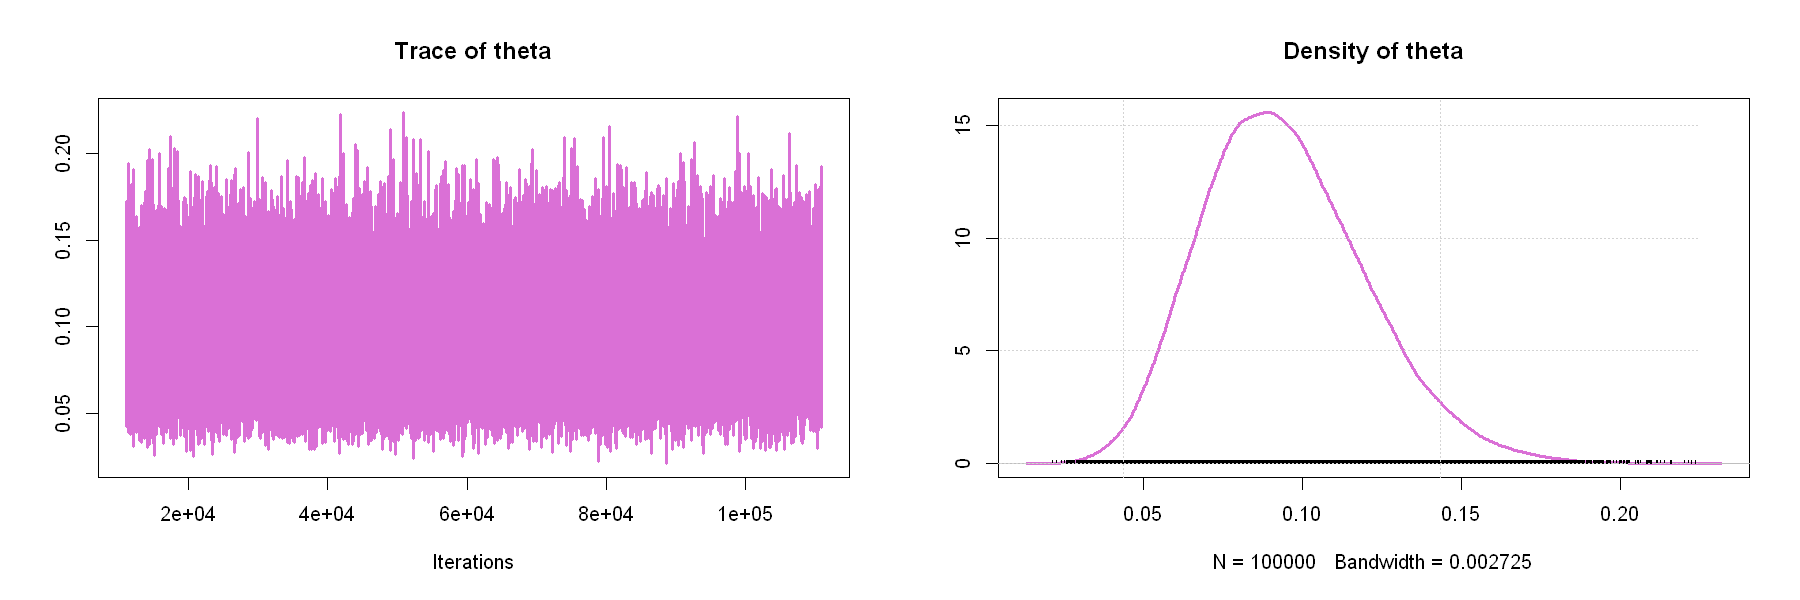

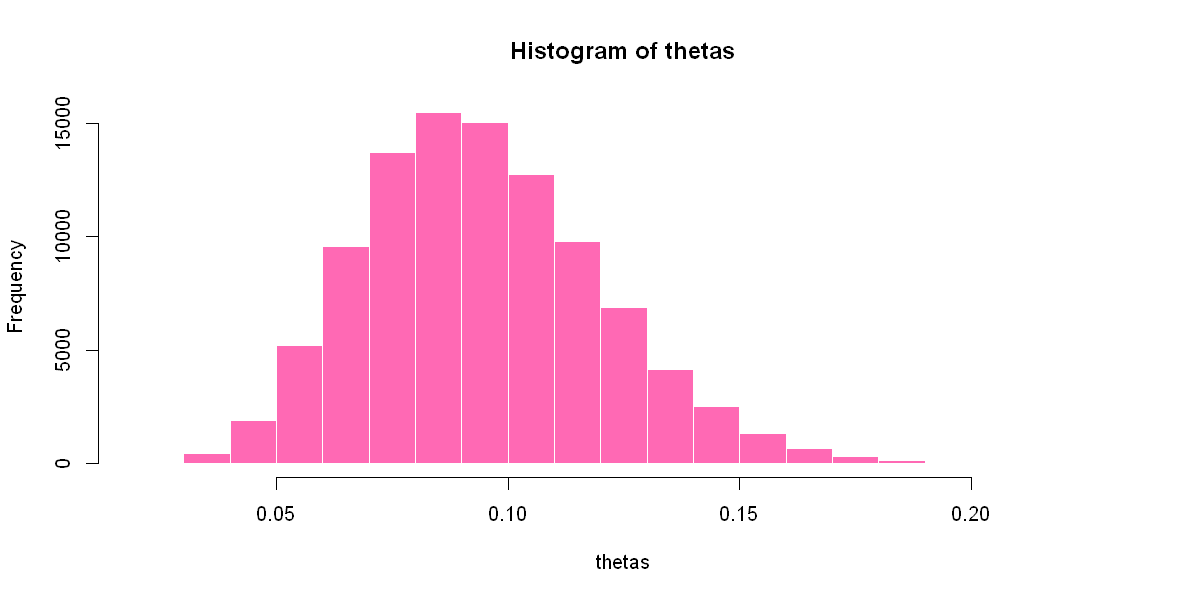

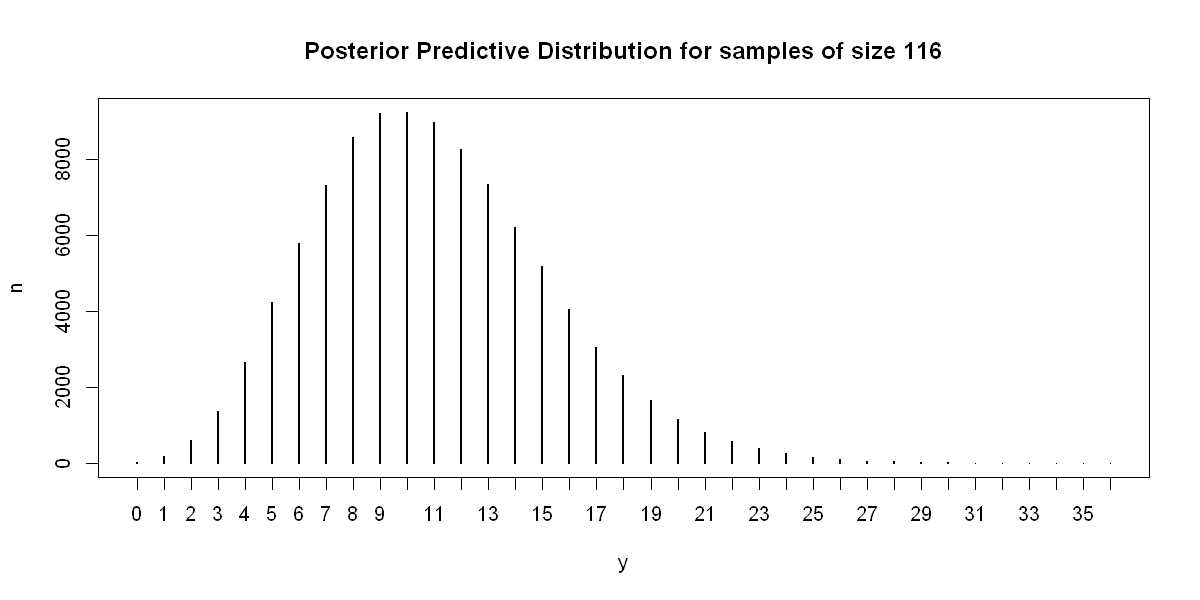

In [33]:
#Given Beta(1,10) as a prior, Bin(n=116,p=11/116) as a likelihood, find the posterior distribution 
#and find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

#Load the data
y <- 11
n <- 116

model_string <- "model{

  # Likelihood
  y ~ dbinom(theta, n)

  # Prior
  theta ~ dbeta(alpha, beta)
  alpha <- 1 # prior successes
  beta <- 10 # prior failures

}"

dataList = list(y = y, n = n)

model <- jags.model(file = textConnection(model_string), 
                    data = dataList)

update(model, n.iter = 10000)
Nrep = 100000 # number of values to simulate

posterior_sample <- coda.samples(model,
                       variable.names = c("theta"),
                       n.iter = Nrep)

collect <- summary(posterior_sample)
collect
mean_new <- collect$statistics["Mean"]
std_new <- collect$statistics["SD"]
interval1 <- collect$quantiles["2.5%"]
interval2 <- collect$quantiles["97.5%"]
diff_mu <- (2*abs(mean_new-p_bay_)/(mean_new+p_bay_))*100
diff_var <- (2*abs(std_new-sqrt(var_beta_))/(std_new+sqrt(var_beta_)))*100
q1 <- (2*abs(interval1-ci1_)/(interval1+ci1_))*100
q2 <- (2*abs(interval2-ci2_)/(interval2+ci2_))*100
cat("The percentage difference between the mean found manually and the mean found with MCMC is:",diff_mu,
    "%\nThe percentage difference between the two stds is:",diff_var,
    "%\nThe percentage difference of the two limits of the credibility intervals are, respectively:",q1,"% and",q2,"%")
a <- round(((1-mean_new)*mean_new^2)/(std_new^2)-mean_new,digits=0)
b <- round(a/mean_new - a,digits=0)
glue("The distribution found for the posterior is equivalent to a Beta({a},{b}), as found in the exercise 3.")
options(repr.plot.width=15, repr.plot.height=5) 
plot(posterior_sample,col="orchid",lwd=3)
grid()

options(repr.plot.width=10, repr.plot.height=5) 
thetas = as.matrix(posterior_sample,lwd=3)
hist(thetas,col="hotpink", border="white")

ynew = rbinom(Nrep, n, thetas)

plot(table(ynew),
     main = "Posterior Predictive Distribution for samples of size 116",
     xlab = "y", ylab="n")